<a href="https://colab.research.google.com/github/manishk1332/homestay_price_prediction/blob/main/property_price_hackathon_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/MyDrive/KDAG_internal/Homestays_Data.csv'
homestay_data = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = homestay_data.copy()

In [ ]:
df.head(5)

id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude   longitude  \
0  Real Bed              strict          True  ...  40.696524  -73.991617   
1  Real Bed              strict          True  ...  40.766115  -73.989040   
2  Real Bed            moderate          True  ...  40.808110  -73.943756   
3  Real Bed            flexible          True  ...  37.772004 -122.431619   
4  Real Bed            moderate          True  ...  38.925627  -77.034596   

                                       name     neighbourhood  \
0            Beautiful brownstone 1-bedroom  Brooklyn Heights   
1  Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2                          The Garden Oasis            Harlem   
3        Beautiful Flat in the Heart of SF!      Lower Haight   
4                Great studio in midtown DC  Columbia Heights   

  number_of_reviews review_scores_rating  \
0                 2                100.0   
1                 6                 93.0   
2                10                 92.0   
3                 0                  NaN   
4                 4                 40.0   

                                       thumbnail_url zipcode bedrooms  beds  
0  https://a0.muscache.com/im/pictures/6d7cbbf7-c...   11201      1.0   1.0  
1  https://a0.muscache.com/im/pictures/348a55fe-4...   10019      3.0   3.0  
2  https://a0.muscache.com/im/pictures/6fae5362-9...   10027      1.0   3.0  
3  https://a0.muscache.com/im/pictures/72208dad-9...   94117      2.0   2.0  
4                                                NaN   20009      0.0   1.0  

[5 rows x 29 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [ ]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [ ]:
df[['number_of_reviews','first_review']]

number_of_reviews first_review
0                      2    6/18/2016
1                      6     8/5/2017
2                     10    4/30/2017
3                      0          NaN
4                      4    5/12/2015
...                  ...          ...
74106                  0          NaN
74107                 16    8/15/2016
74108                 43     1/3/2015
74109                  0          NaN
74110                205     9/5/2013

[74111 rows x 2 columns]

In [ ]:
df[df['first_review'].isna() & df['last_review'].isna()].count()

id                        15827
log_price                 15827
property_type             15827
room_type                 15827
amenities                 15827
accommodates              15827
bathrooms                 15787
bed_type                  15827
cancellation_policy       15827
cleaning_fee              15827
city                      15827
description               15827
first_review                  0
host_has_profile_pic      15791
host_identity_verified    15791
host_response_rate         7409
host_since                15791
instant_bookable          15827
last_review                   0
latitude                  15827
longitude                 15827
name                      15827
neighbourhood             14060
number_of_reviews         15827
review_scores_rating          1
thumbnail_url             13539
zipcode                   15555
bedrooms                  15807
beds                      15759
dtype: int64

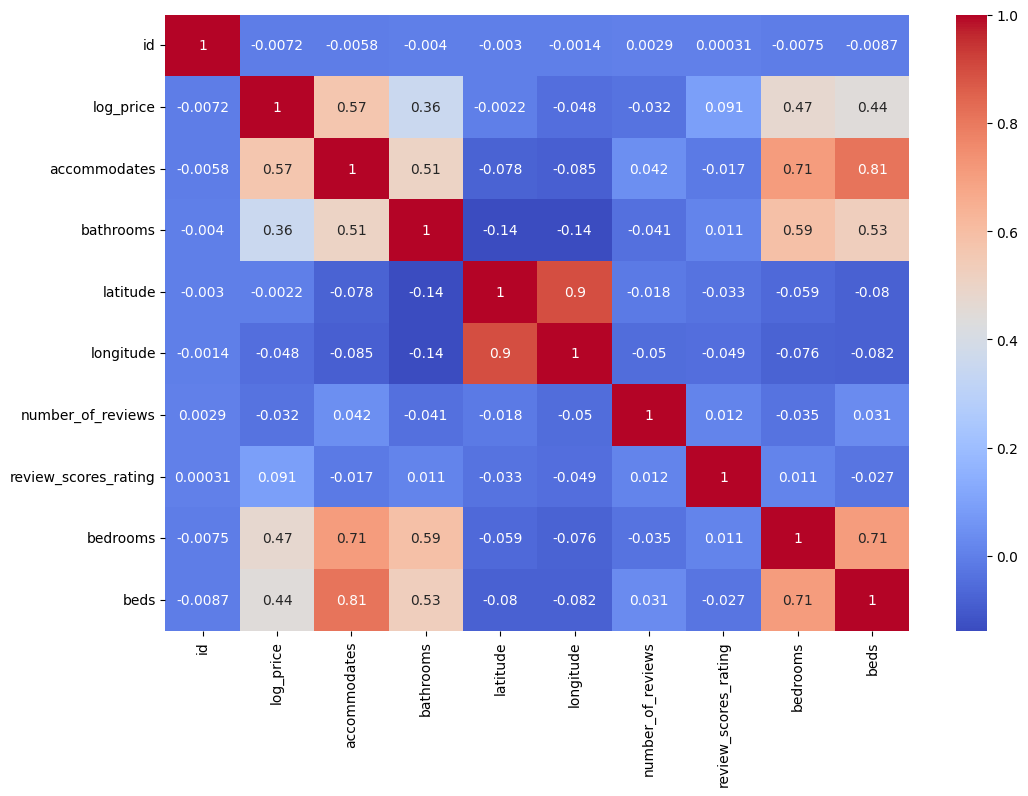

In [ ]:
# Select all numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Calculate the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

#Imputing Features

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
df_to_impute = df[['bathrooms', 'log_price', 'accommodates', 'bedrooms']]
imputer = KNNImputer(n_neighbors=5)
df_to_impute['bathrooms'] = imputer.fit_transform(df_to_impute[['bathrooms', 'log_price', 'accommodates', 'bedrooms']])

df.update(df_to_impute)

In [ ]:
df['host_has_profile_pic']=df['host_has_profile_pic'].fillna('f')
df['host_identity_verified']=df['host_identity_verified'].fillna('f')

In [ ]:
df['host_has_profile_pic'] = df['host_has_profile_pic'].map({'t': True, 'f': False})
df['host_identity_verified'] = df['host_identity_verified'].map({'t': True, 'f': False})
df['instant_bookable'] = df['instant_bookable'].map({'t': True, 'f': False})

In [ ]:
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(float) / 100

In [ ]:
numeric_df = df.select_dtypes(exclude=['object'])
corr_matrix = numeric_df.corr()
host_response_rate_corr = corr_matrix['host_response_rate']
print(host_response_rate_corr)

id                       -0.004782
log_price                -0.006777
accommodates              0.047036
bathrooms                 0.006688
cleaning_fee              0.117460
host_has_profile_pic      0.025330
host_identity_verified    0.082103
host_response_rate        1.000000
instant_bookable          0.102220
latitude                  0.008279
longitude                -0.014721
number_of_reviews         0.123065
review_scores_rating      0.094395
bedrooms                  0.020566
beds                      0.041518
Name: host_response_rate, dtype: float64


In [ ]:
mean_response_rate = df['host_response_rate'].mean()
df['host_response_rate'] = df['host_response_rate'].fillna(mean_response_rate)


In [ ]:
df_to_impute = df[['bedrooms', 'log_price', 'accommodates', 'bathrooms', 'beds']]
imputer = KNNImputer(n_neighbors=5)
df_to_impute['bedrooms'] = imputer.fit_transform(df_to_impute[['bedrooms', 'log_price', 'accommodates', 'bathrooms', 'beds']])

df.update(df_to_impute)

In [ ]:
df_to_impute = df[['beds', 'log_price', 'accommodates', 'bathrooms', 'bedrooms']]
imputer = KNNImputer(n_neighbors=5)
df_to_impute['beds'] = imputer.fit_transform(df_to_impute[['beds', 'log_price', 'accommodates', 'bathrooms', 'bedrooms']])

df.update(df_to_impute)

In [ ]:
df['review_scores_rating']

0        100.0
1         93.0
2         92.0
3          NaN
4         40.0
         ...  
74106      NaN
74107     93.0
74108     94.0
74109      NaN
74110     96.0
Name: review_scores_rating, Length: 74111, dtype: float64

review_scores_rating does not have correlation with any other feature, so just using mean imputer

In [ ]:
df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].mean())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               74111 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    74111 non-null  bool   
 14  host_identity_verified  74111 non-null

Dropping irrelevant columns

In [ ]:
df = df.drop(columns=['first_review', 'thumbnail_url'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               74111 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  host_has_profile_pic    74111 non-null  bool   
 13  host_identity_verified  74111 non-null  bool   
 14  host_response_rate      74111 non-null

#EDA

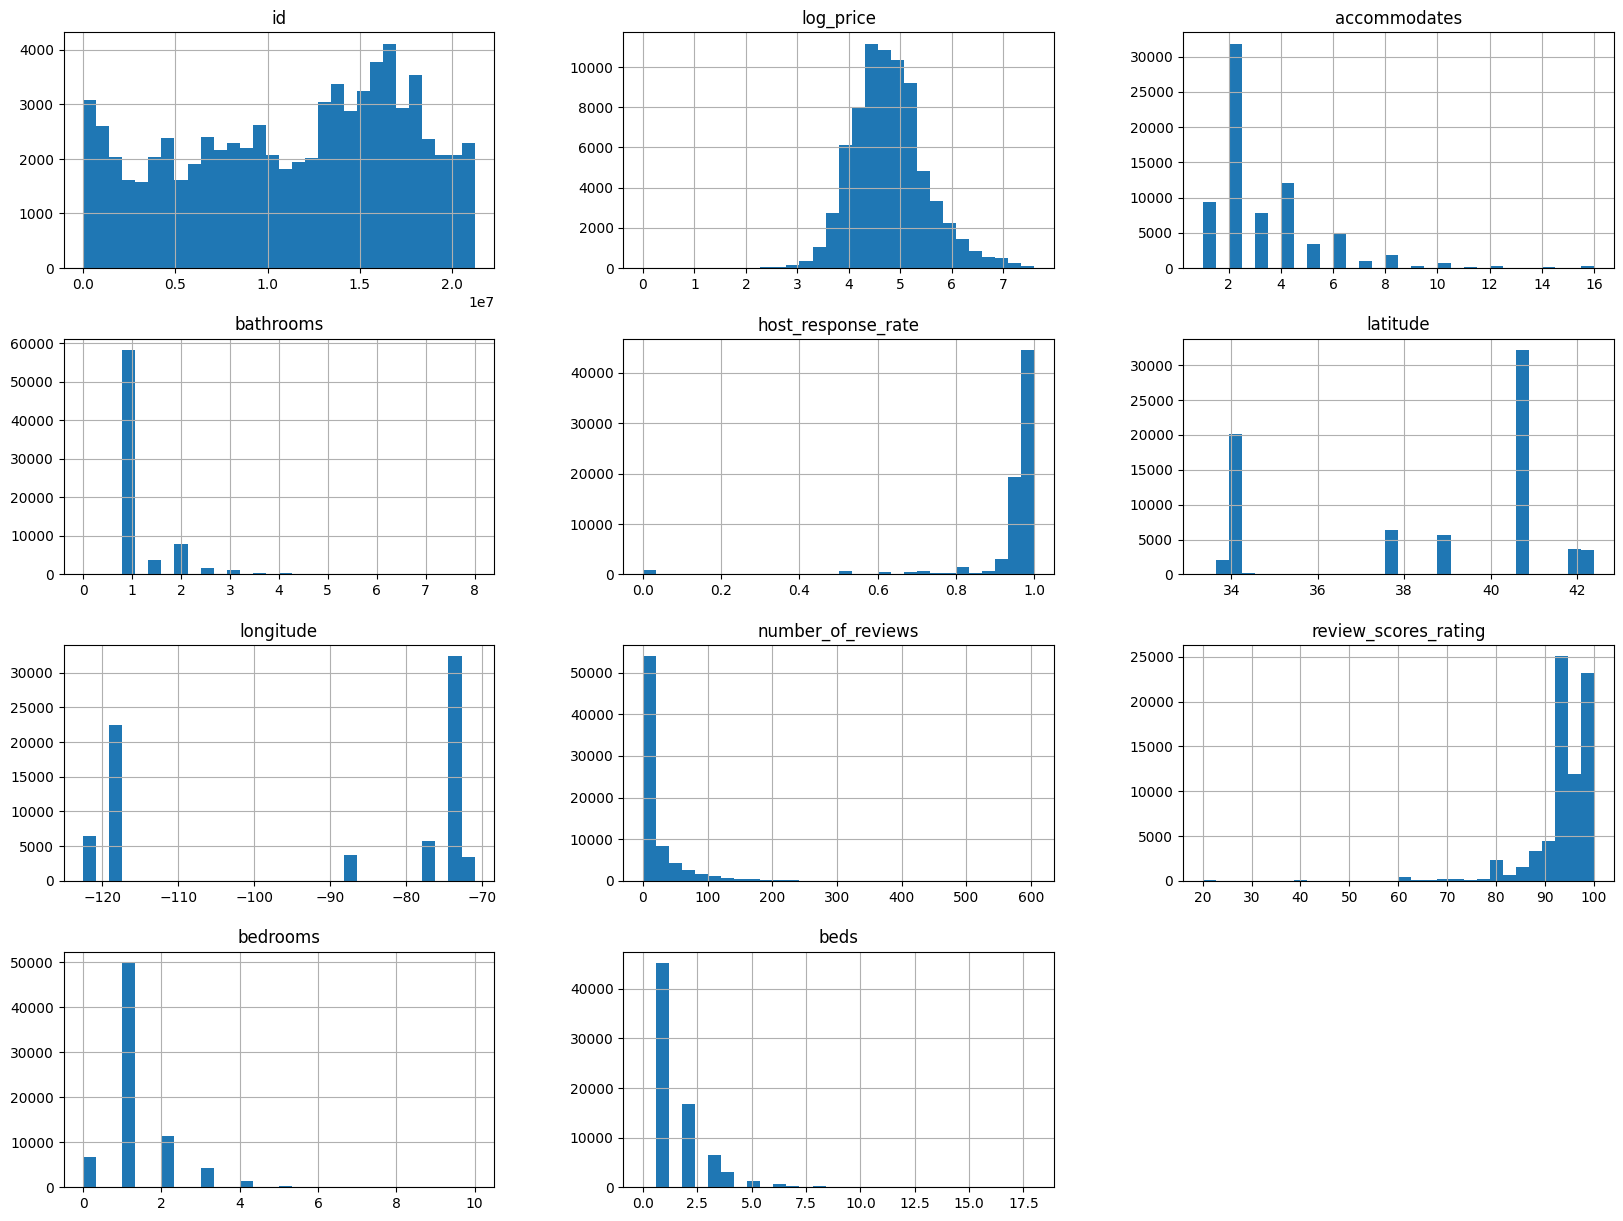

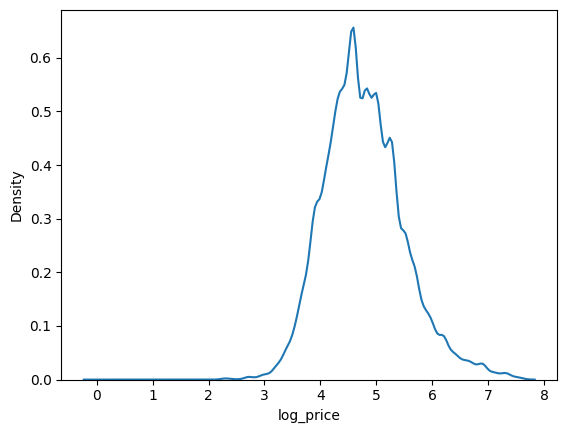

In [ ]:
# Histograms and Kernel Density Estimate (KDE) Plots

# Plot histograms for all numerical columns
df.hist(bins=30, figsize=(20, 15))
plt.show()

# KDE plot for a specific numerical column (e.g., log_price)
sns.kdeplot(df['log_price'])
plt.show()

FOR THE PLOT BETWEEN DENSITY AND LOG_PRICES

Key Observations:

Skewness: The distribution is right-skewed. This means that there is a tail extending to the right, indicating that there are some high log price values that are more extreme than the majority of the data.

Peak: The peak of the distribution is around the value of 4. This suggests that the majority of log prices in the dataset are clustered around this value.

Mode: The distribution appears to have a single mode (peak). This indicates that there is a single most common log price value.

Tails: Both tails of the distribution are relatively thin, suggesting that there are fewer data points at the very low and very high log price values.


Implications:

Transformation:
The right-skewness suggests that the log_price feature might benefit from a transformation, such as a log transformation, to make it more normally distributed. This can improve the performance of certain machine learning algorithms that assume normality.

Outliers:
The thin tails indicate that there might be some outliers, especially in the high log price range. It might be worth investigating these outliers to understand their impact on the overall distribution and consider whether they should be handled (e.g., removed or adjusted).

Feature Importance:
The concentration of data around the peak suggests that log_price might be an important feature in predicting the target variable (if applicable). However, the skewness and potential outliers should be taken into account when modeling.

Business Understanding:
The shape of the distribution can provide insights into the business context. For example, a right-skewed distribution might indicate that there are a few high-priced listings that are significantly different from the majority of listings.

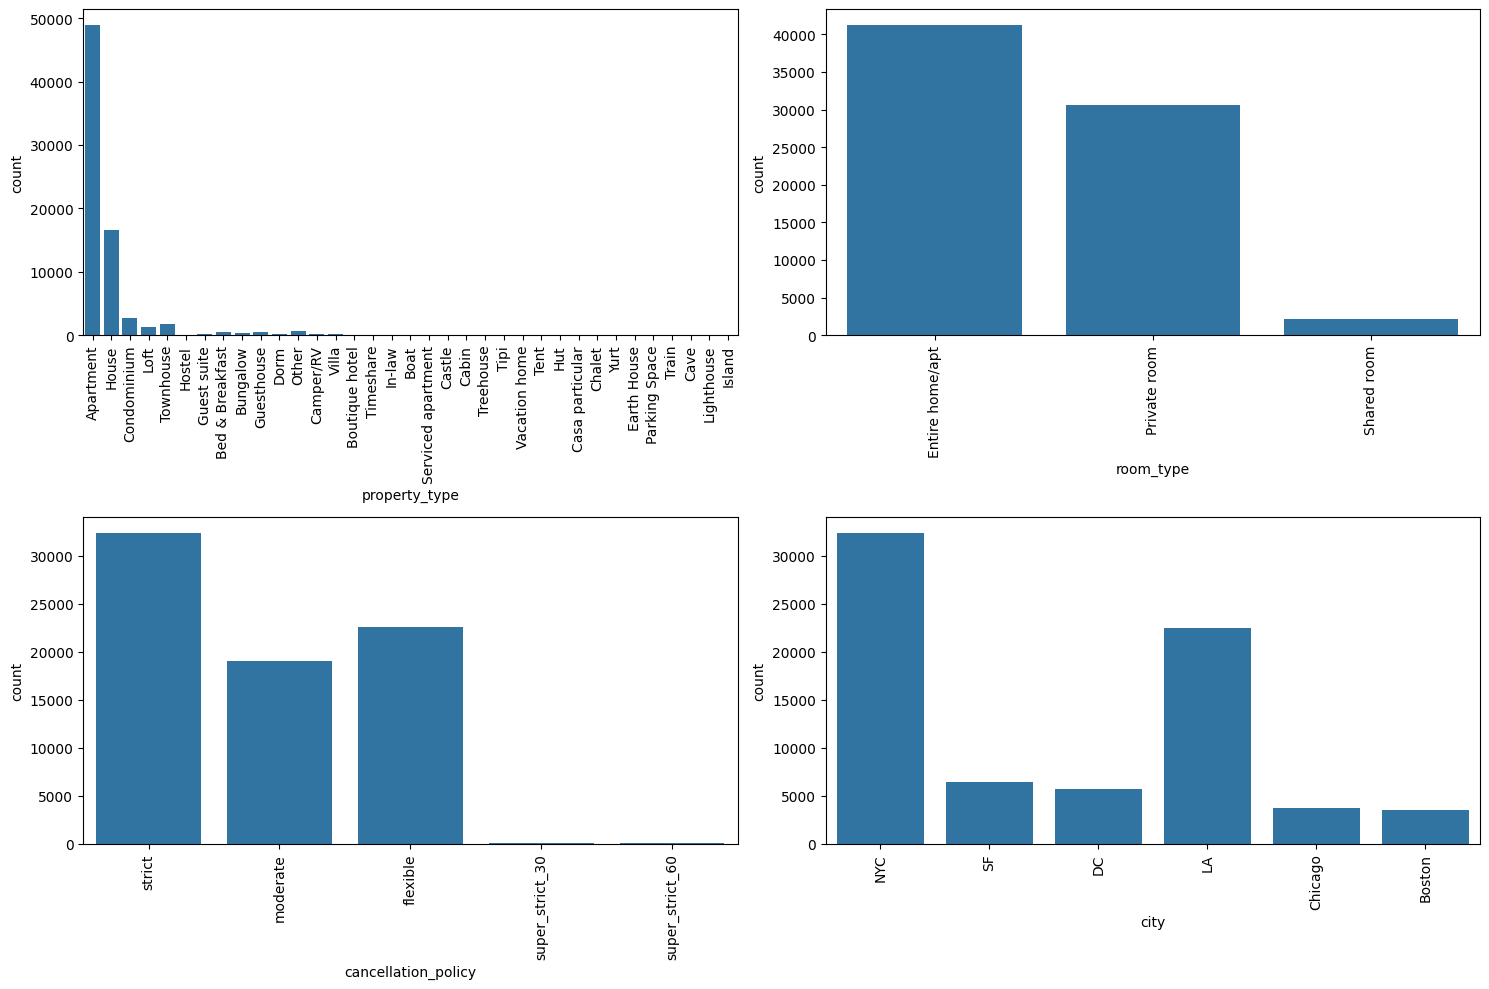

In [ ]:
# Create a figure and axes
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot countplots for each categorical feature
sns.countplot(x='property_type', data=df, ax=axes[0, 0])
sns.countplot(x='room_type', data=df, ax=axes[0, 1])
sns.countplot(x='cancellation_policy', data=df, ax=axes[1, 0])
sns.countplot(x='city', data=df, ax=axes[1, 1])

# Rotate x-axis labels for better readability
axes[0, 0].tick_params(axis='x', rotation=90)
axes[0, 1].tick_params(axis='x', rotation=90)
axes[1, 0].tick_params(axis='x', rotation=90)
axes[1, 1].tick_params(axis='x', rotation=90)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

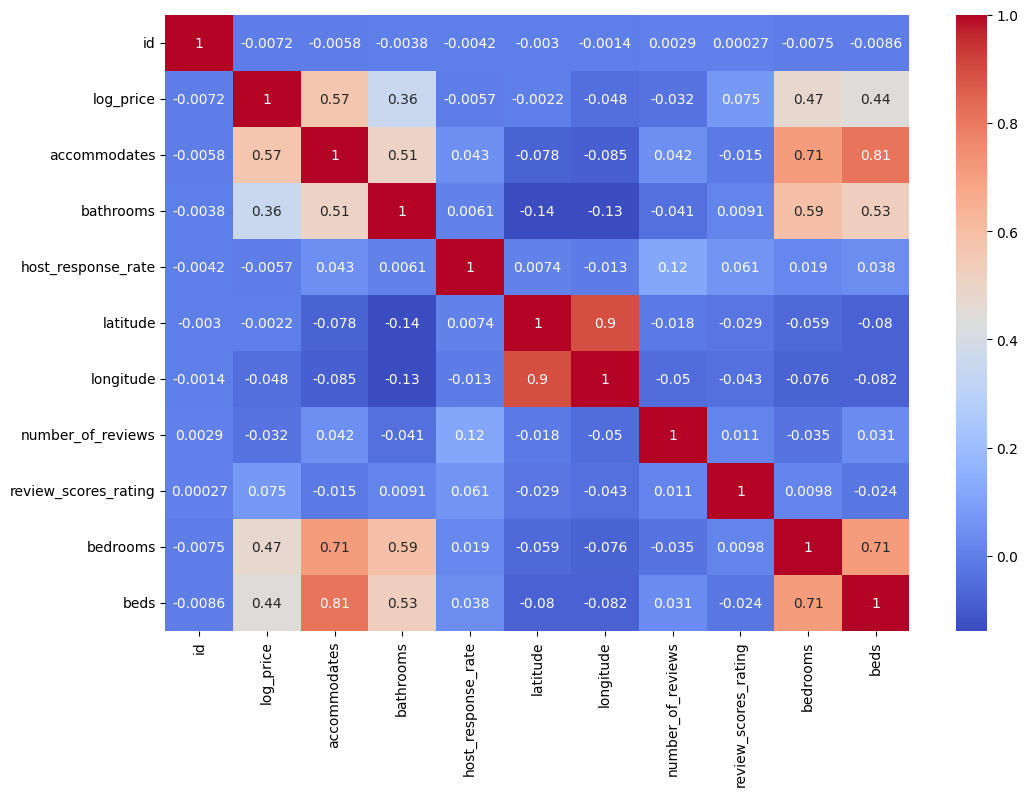

In [ ]:
# Select all numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Calculate the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

Key Observations

**Strong Positive Correlations:**

Accommodates vs. Beds:
A strong positive correlation indicates that listings with more accommodates tend to have more beds.

Accommodates vs. Bathrooms:
A moderately strong positive correlation suggests that listings with more accommodates often have more bathrooms.

Latitude vs. Longitude:
This is expected as locations are typically represented by latitude and longitude coordinates, which are closely related.

Bedrooms vs. Beds:
A very strong positive correlation indicates that listings with more bedrooms usually have more beds.


**Negative Correlations:**

Log Price vs. Number of Reviews:
A weak negative correlation suggests that listings with higher log prices might have fewer reviews, possibly due to higher costs deterring some potential guests.

Review Scores Rating vs. Bedrooms:
A weak negative correlation indicates that listings with more bedrooms might have slightly lower review scores, potentially due to factors like shared spaces or larger group dynamics.


**Weak or No Correlations:**

Host Response Rate vs. Most Features:
There are generally weak or no correlations between host response rate and other features, suggesting that it might not have a strong influence on the target variable (log price).

Relevance vs. Most Features:
Relevance seems to have weak or no correlations with other features, indicating that it might be a less influential factor in determining the target variable.

In [ ]:
numeric_df = df.select_dtypes(exclude=['object'])
corr_matrix = numeric_df.corr()
log_price_corr = corr_matrix['log_price'].sort_values(ascending=False)
print(log_price_corr)

log_price                 1.000000
accommodates              0.567574
bedrooms                  0.473041
beds                      0.442040
bathrooms                 0.355223
cleaning_fee              0.111191
review_scores_rating      0.074822
host_identity_verified    0.024325
latitude                 -0.002193
host_response_rate       -0.005748
id                       -0.007178
host_has_profile_pic     -0.007484
number_of_reviews        -0.032470
instant_bookable         -0.044271
longitude                -0.047529
Name: log_price, dtype: float64


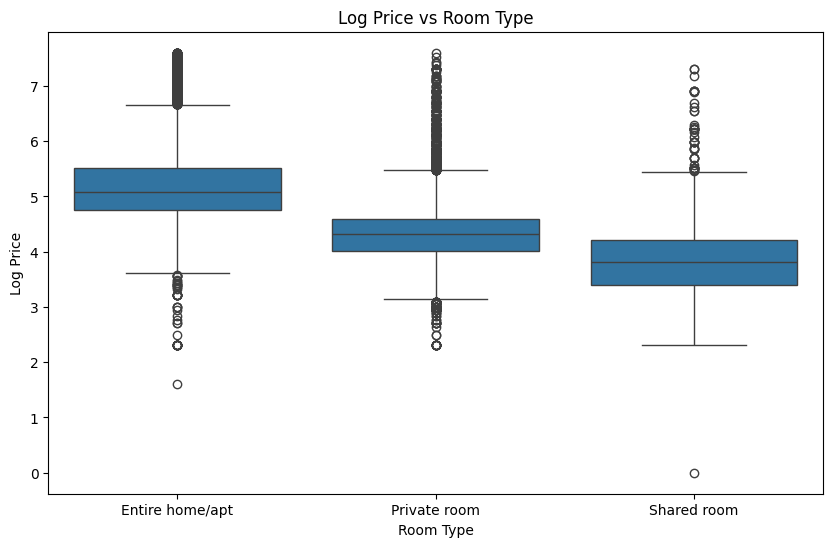

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='log_price', data=df)
plt.title('Log Price vs Room Type')
plt.xlabel('Room Type')
plt.ylabel('Log Price')
plt.show()

Clearly there is relation between room_type and log_price, with home/apt being more expensive

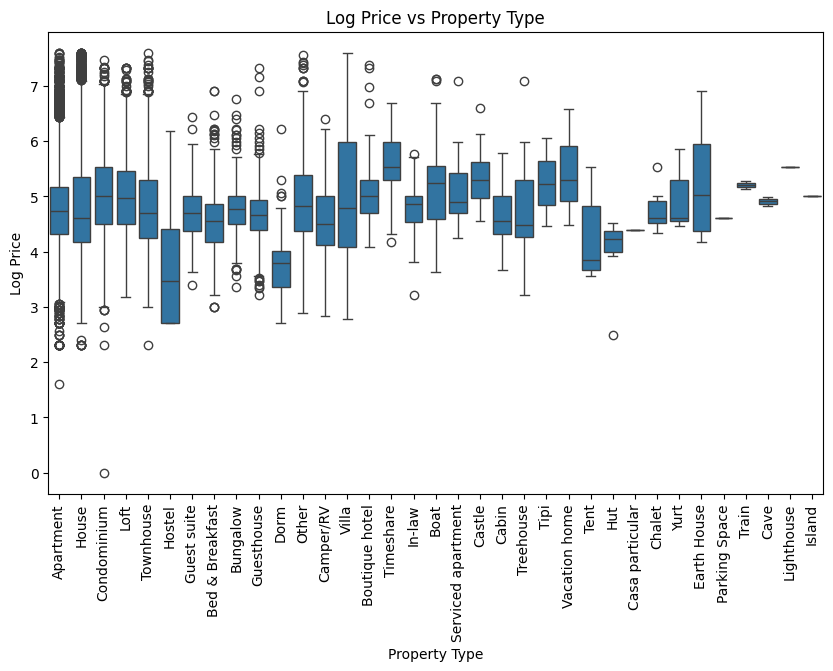

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='property_type', y='log_price', data=df)
plt.title('Log Price vs Property Type')
plt.xlabel('Property Type')
plt.ylabel('Log Price')
plt.xticks(rotation=90)
plt.show()

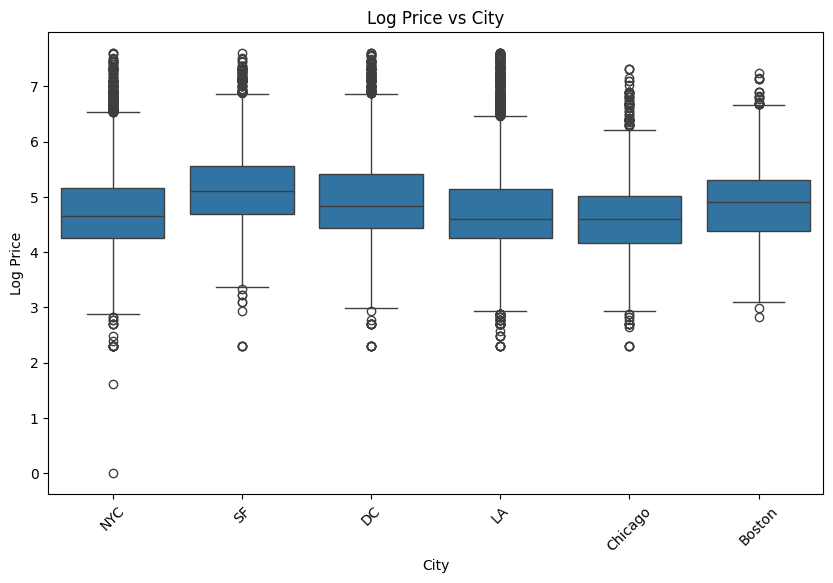

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='city', y='log_price', data=df)
plt.title('Log Price vs City')
plt.xlabel('City')
plt.ylabel('Log Price')
plt.xticks(rotation=45)
plt.show()

# Geospatial Analysis

In [ ]:
!pip install basemap

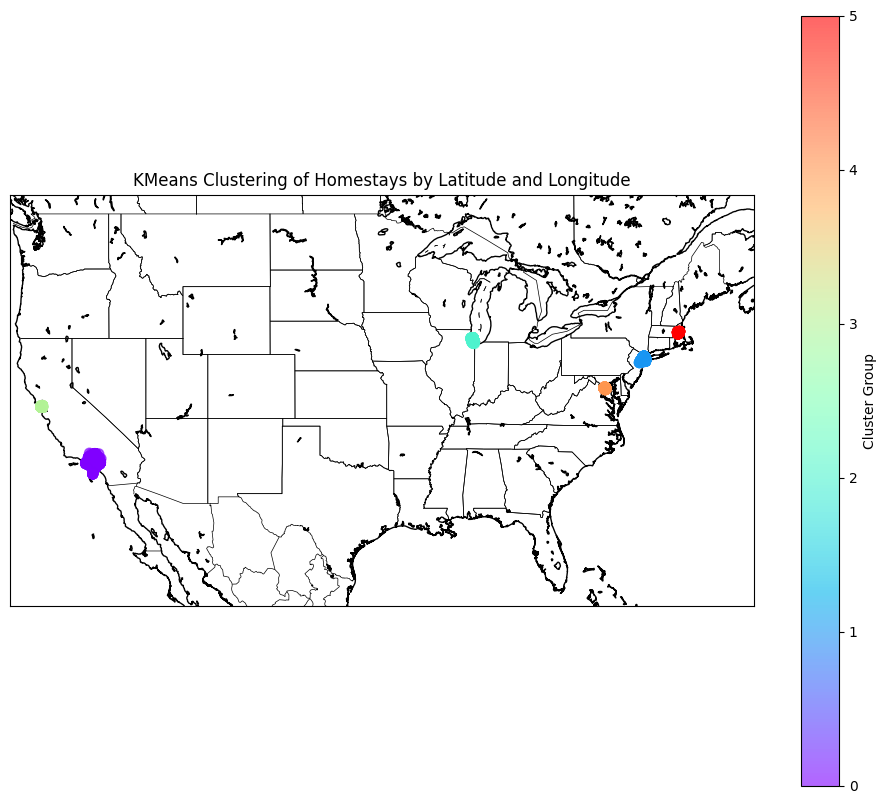

       city          neighbourhood  number_of_homestays  avg_log_price
0    boston       Allston-Brighton                  414       4.416305
1    boston               Back Bay                  296       5.284117
2    boston            Beacon Hill                  203       5.215321
3    boston              Brookline                    2       4.807903
4    boston              Cambridge                    2       5.755211
..      ...                    ...                  ...            ...
638      sf             Twin Peaks                   76       5.192006
639      sf           Union Square                   35       5.109113
640      sf      Visitacion Valley                   37       4.674289
641      sf            West Portal                   11       4.759170
642      sf  Western Addition/NOPA                  397       5.222118

[643 rows x 4 columns]


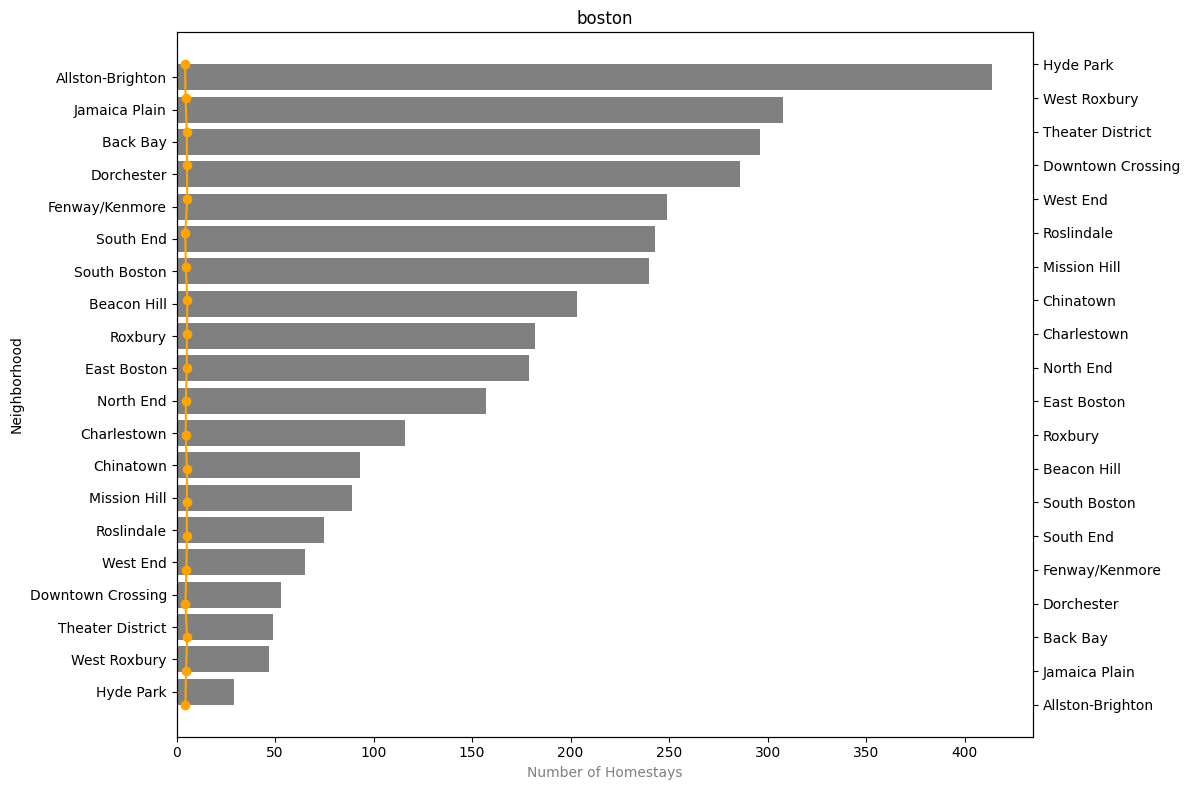

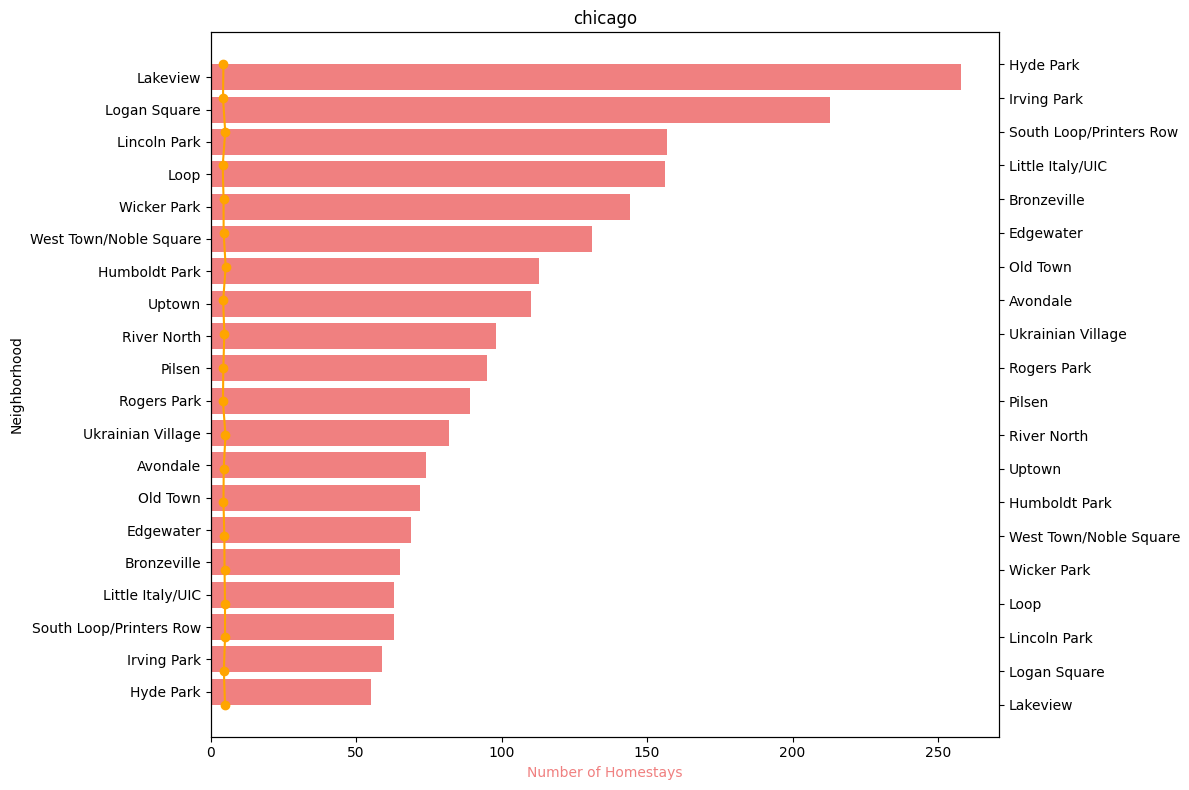

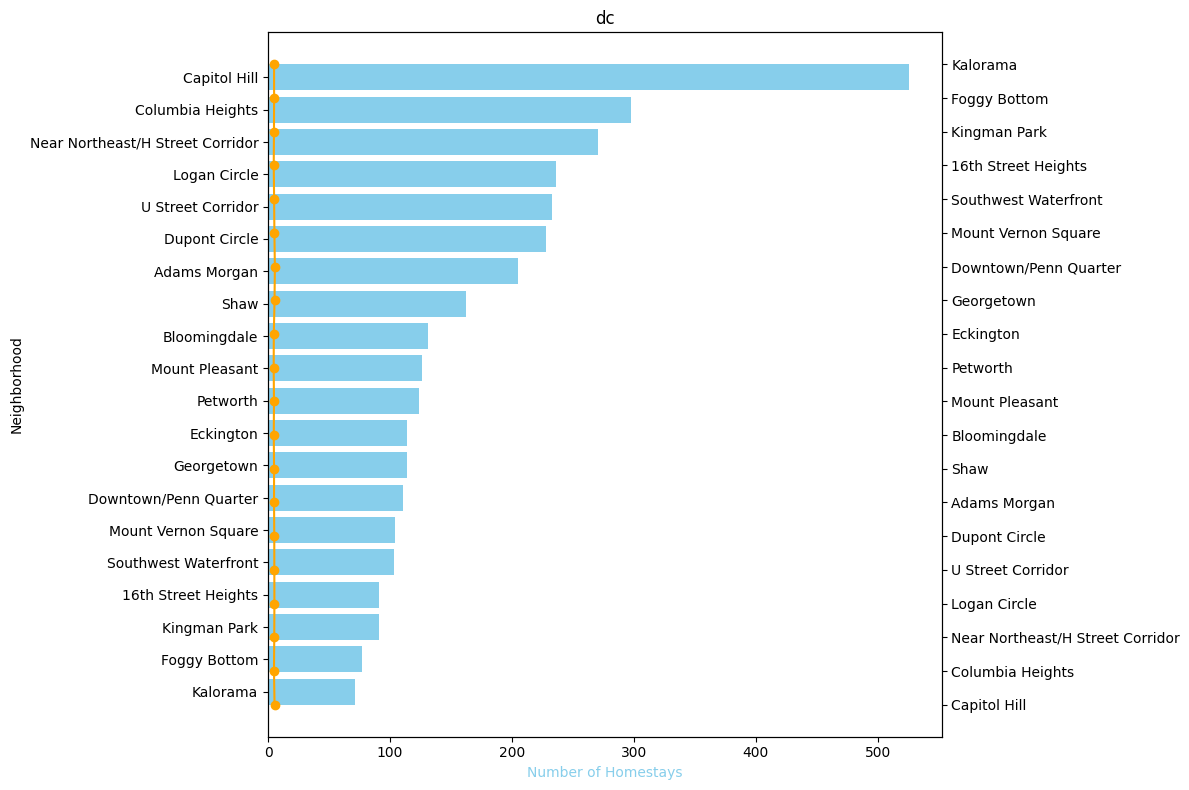

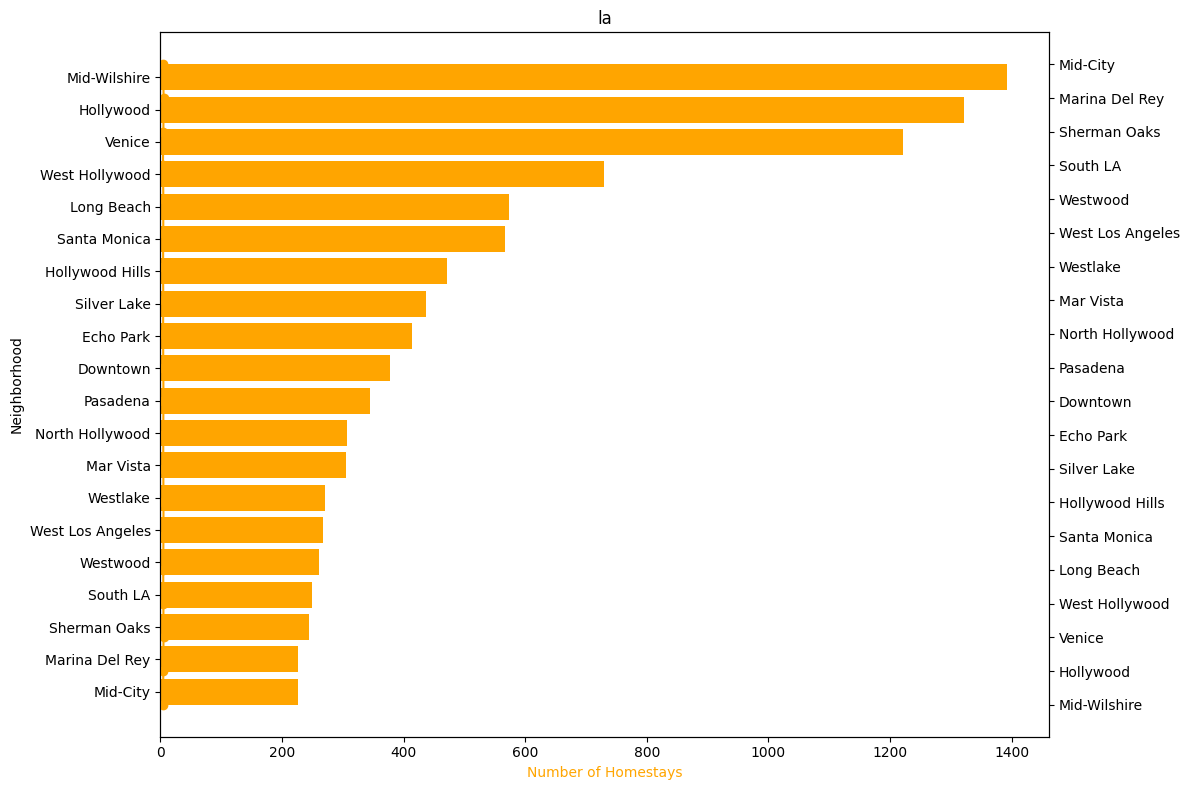

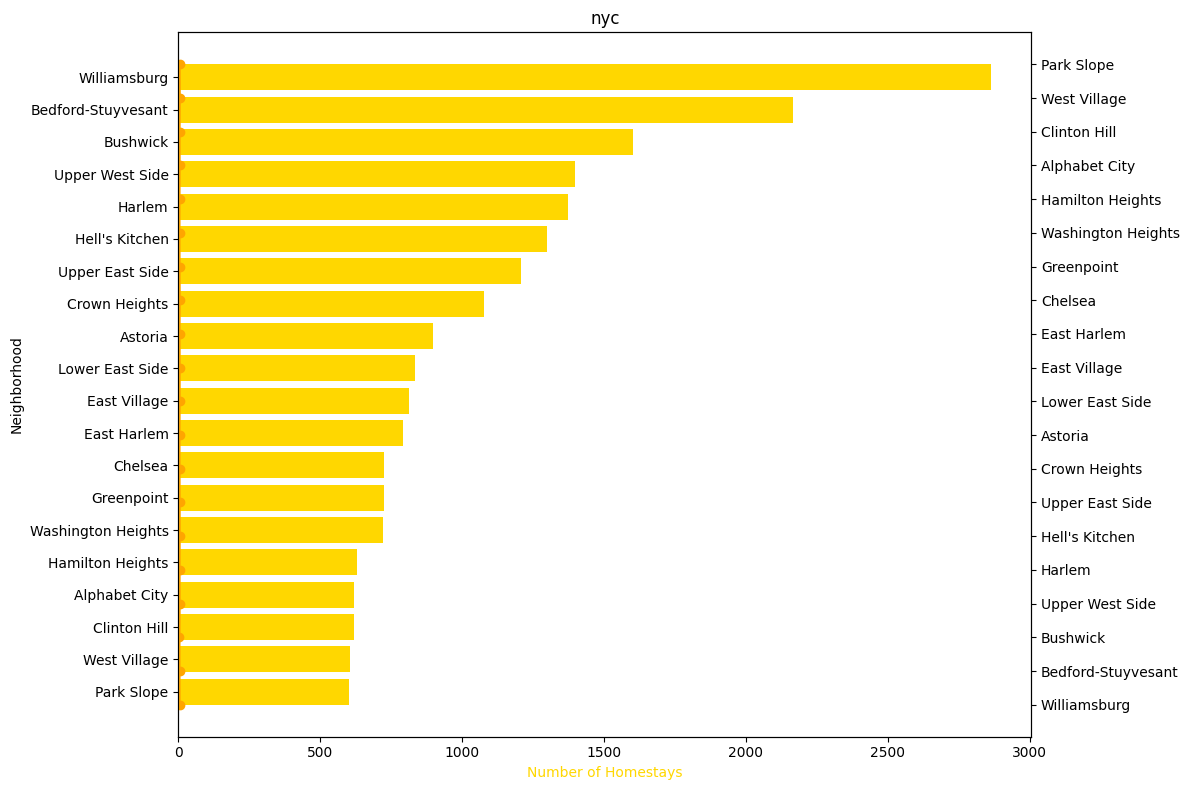

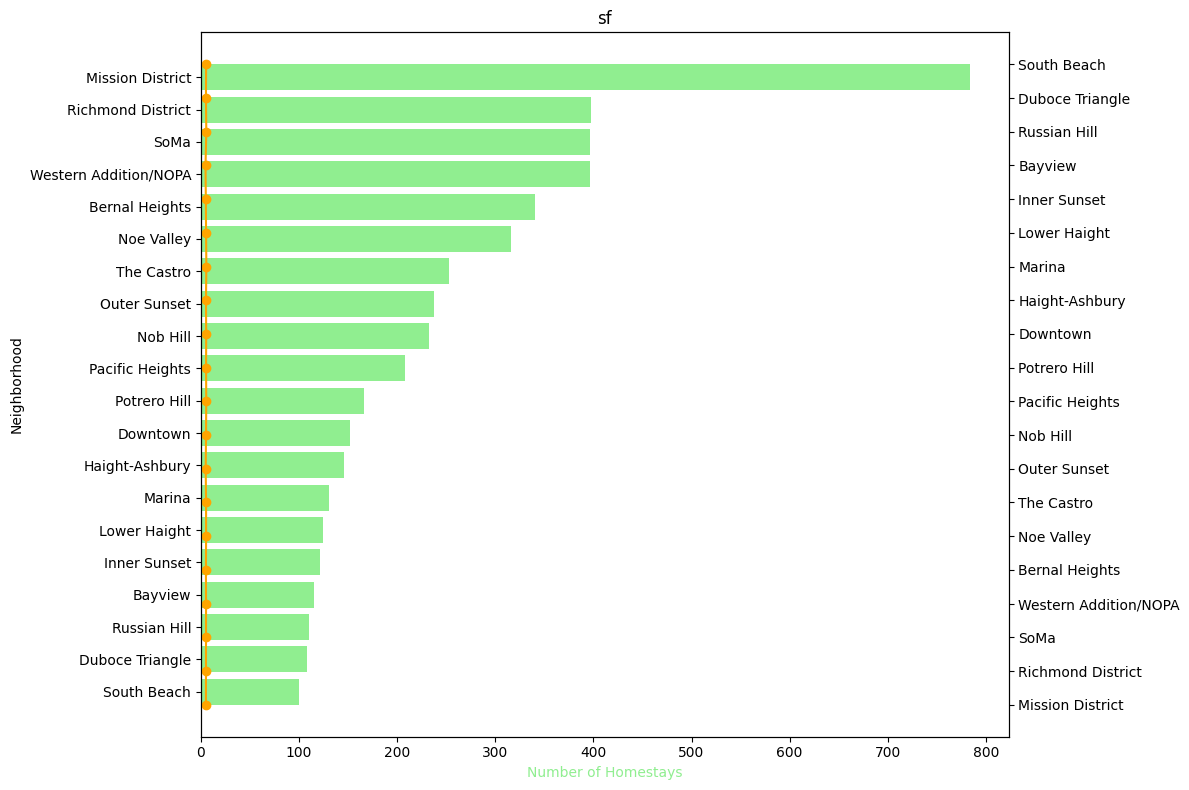

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap

# Normalize city names to avoid case sensitivity issues
df['city'] = df['city'].str.strip().str.lower()

# Apply KMeans clustering for all cities
locations = df[['latitude', 'longitude']].values  # Use all available cities for clustering
kmeans = KMeans(n_clusters=6, random_state=42)  # Set 6 clusters as an example
df['Cluster'] = kmeans.fit_predict(locations)

# Function to plot clusters on the US map using Basemap
def plot_clusters(df):
    plt.figure(figsize=(12, 10))

    # Set up the Basemap instance focused on the US
    m = Basemap(projection='merc',
                llcrnrlat=24, urcrnrlat=50,
                llcrnrlon=-125, urcrnrlon=-65,
                resolution='i')

    # Draw coastlines, countries, and states
    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()

    # Convert latitude and longitude to map projection coordinates
    x, y = m(df['longitude'].values, df['latitude'].values)

    # Plot the points, using cluster labels to differentiate the colors
    scatter = m.scatter(x, y, c=df['Cluster'], cmap='rainbow', marker='o', s=50, alpha=0.6, zorder=5)

    # Add color bar legend
    plt.colorbar(scatter, label='Cluster Group')
    plt.title('KMeans Clustering of Homestays by Latitude and Longitude')
    plt.show()

# Call the function to plot the clusters
plot_clusters(df)

# Group by city and neighborhood to count homestays and calculate average log price
city_neighborhood_analysis = df.groupby(['city', 'neighbourhood'])['log_price'].agg(
    ['count', 'mean']).reset_index().rename(columns={'count': 'number_of_homestays', 'mean': 'avg_log_price'})

# Print the results
print(city_neighborhood_analysis)

# Define a color palette for 6 different cities
city_colors = {
    'nyc': 'gold',
    'sf': 'lightgreen',
    'dc': 'skyblue',
    'chicago': 'lightcoral',
    'miami': 'plum',
    'la': 'orange'
}

# Function to plot top 20 neighborhoods by the number of homestays for each city, with unique colors for each city
def plot_top_20_analysis(df_analysis):
    cities = df_analysis['city'].unique()

    # Sort by the number of homestays and filter top 20 neighborhoods for each city
    for city in cities:
        city_data = df_analysis[df_analysis['city'] == city]
        top_20_neighborhoods = city_data.nlargest(20, 'number_of_homestays')

        fig, ax1 = plt.subplots(figsize=(12, 8))

        # Use the color associated with each city
        color = city_colors.get(city, 'gray')  # Default color is gray if not in city_colors

        # Plot number of homestays as horizontal bars with the city's assigned color
        ax1.barh(top_20_neighborhoods['neighbourhood'], top_20_neighborhoods['number_of_homestays'],
                 color=color, label=f'Number of Homestays in {city.capitalize()}')
        ax1.set_xlabel('Number of Homestays', color=color)
        ax1.set_ylabel('Neighborhood')
        ax1.invert_yaxis()  # Invert to display top 20 in descending order

        # Plot average log_price as a line (on the right axis)
        ax2 = ax1.twinx()
        ax2.plot(top_20_neighborhoods['avg_log_price'], top_20_neighborhoods['neighbourhood'],
                 color='orange', marker='o', label='Average Log Price')
        ax2.set_xlabel('Average Log Price', color='orange')

        plt.title(f'{city}')
        plt.tight_layout()
        plt.show()

# Call the function to plot the analysis for all cities
plot_top_20_analysis(city_neighborhood_analysis)


In [ ]:
df.head()

id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude   longitude  \
0  Real Bed              strict          True  ...  40.696524  -73.991617   
1  Real Bed              strict          True  ...  40.766115  -73.989040   
2  Real Bed            moderate          True  ...  40.808110  -73.943756   
3  Real Bed            flexible          True  ...  37.772004 -122.431619   
4  Real Bed            moderate          True  ...  38.925627  -77.034596   

                                       name     neighbourhood  \
0            Beautiful brownstone 1-bedroom  Brooklyn Heights   
1  Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2                          The Garden Oasis            Harlem   
3        Beautiful Flat in the Heart of SF!      Lower Haight   
4                Great studio in midtown DC  Columbia Heights   

   number_of_reviews review_scores_rating  zipcode bedrooms  beds  Cluster  
0                  2           100.000000    11201      1.0   1.0        1  
1                  6            93.000000    10019      3.0   3.0        1  
2                 10            92.000000    10027      1.0   3.0        1  
3                  0            94.067365    94117      2.0   2.0        3  
4                  4            40.000000    20009      0.0   1.0        4  

[5 rows x 28 columns]

In [ ]:
# Group by neighbourhood and calculate the average log_price
avg_log_price_by_neighbourhood = df.groupby('neighbourhood')['log_price'].mean()

# Print the result
print(avg_log_price_by_neighbourhood)


neighbourhood
16th Street Heights    4.678871
Adams Morgan           4.938512
Alamo Square           5.146056
Albany Park            4.261205
Alhambra               4.192189
                         ...   
Woodlawn               4.222119
Woodley Park           5.177355
Woodridge              4.477237
Woodside               4.303016
Wrigleyville           5.067043
Name: log_price, Length: 619, dtype: float64


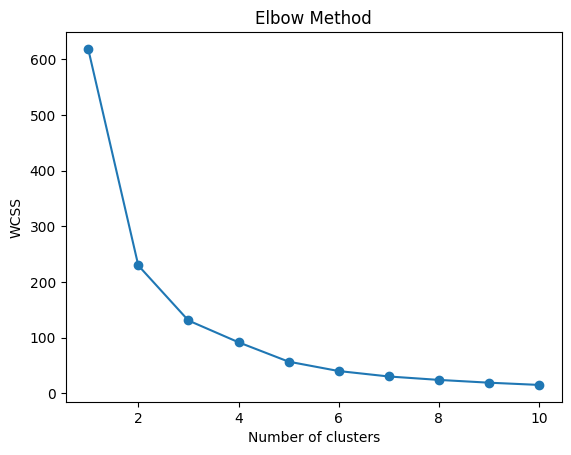

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Extract the average log price for each neighborhood
avg_log_price_by_neighbourhood = df.groupby('neighbourhood')['log_price'].mean()

# Convert the Series to a DataFrame
neighbourhood_df = avg_log_price_by_neighbourhood.to_frame().reset_index()

# Scale the log_price values
scaler = StandardScaler()
neighbourhood_df['log_price_scaled'] = scaler.fit_transform(neighbourhood_df[['log_price']])

# Elbow method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(neighbourhood_df[['log_price_scaled']])
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(range(1, 11), wcss,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


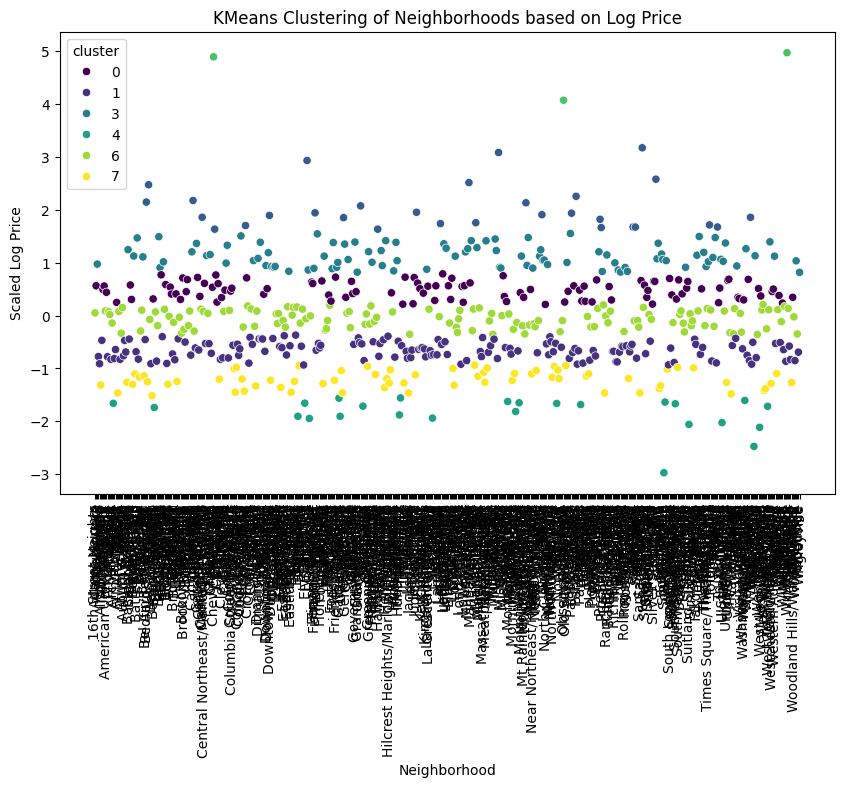

In [ ]:
# Apply KMeans clustering with 6 clusters
kmeans = KMeans(n_clusters=8, random_state=42)
neighbourhood_df['cluster'] = kmeans.fit_predict(neighbourhood_df[['log_price_scaled']])

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='neighbourhood', y='log_price_scaled', hue='cluster', data=neighbourhood_df, palette='viridis')
plt.title('KMeans Clustering of Neighborhoods based on Log Price')
plt.xlabel('Neighborhood')
plt.ylabel('Scaled Log Price')
plt.xticks(rotation=90)
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() # Create a LabelEncoder object and assign it to the variable 'le'

neighbourhood_df['neighbourhood_encoded'] = le.fit_transform(neighbourhood_df['neighbourhood'])

In [ ]:
neighbourhood_df

neighbourhood  log_price  log_price_scaled  cluster  \
0    16th Street Heights   4.678871          0.050675        6   
1           Adams Morgan   4.938512          0.563577        0   
2           Alamo Square   5.146056          0.973564        3   
3            Albany Park   4.261205         -0.774393        1   
4               Alhambra   4.192189         -0.910728        1   
..                   ...        ...               ...      ...   
614             Woodlawn   4.222119         -0.851603        1   
615         Woodley Park   5.177355          1.035393        3   
616            Woodridge   4.477237         -0.347638        6   
617             Woodside   4.303016         -0.691798        1   
618         Wrigleyville   5.067043          0.817479        3   

     neighbourhood_encoded  
0                        0  
1                        1  
2                        2  
3                        3  
4                        4  
..                     ...  
614                    614  
615                    615  
616                    616  
617                    617  
618                    618  

[619 rows x 5 columns]

# **Key Observations:**

**Median Log Price:**

NYC and SF: Have the highest median log prices, suggesting that listings in these cities tend to be more expensive.
Boston: Has the lowest median log price.

Other Cities: DC, LA, and Chicago have similar median log prices.



**IQR:**
NYC and SF: Have a relatively large IQR, indicating a wider range of log prices within these cities.

Boston: Has a relatively small IQR, suggesting a more concentrated distribution of log prices.

Other Cities: Have moderate IQRs.

**Outliers:**

NYC: Has the most outliers, suggesting that there are some listings in NYC with significantly higher or lower log prices compared to the majority.

Other Cities: Have fewer outliers.

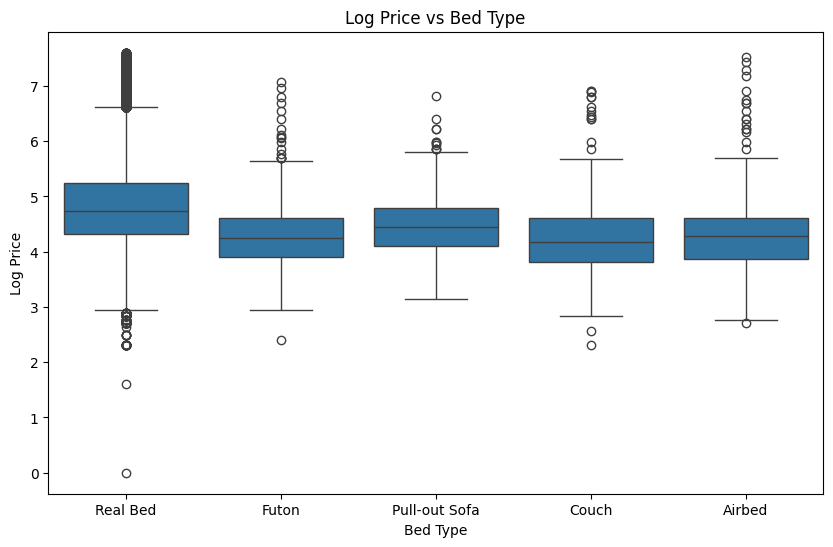

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bed_type', y='log_price', data=df)
plt.title('Log Price vs Bed Type')
plt.xlabel('Bed Type')
plt.ylabel('Log Price')
plt.show()

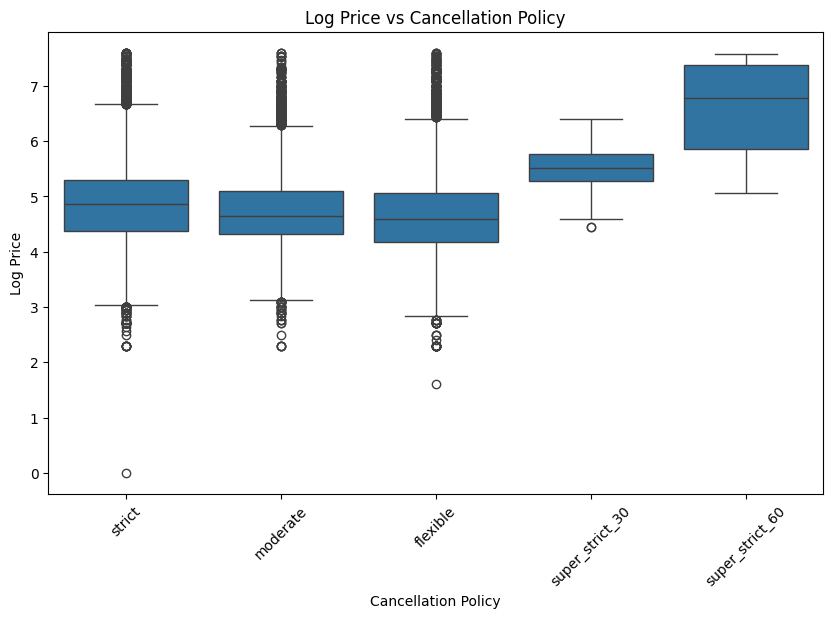

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cancellation_policy', y='log_price', data=df)
plt.title('Log Price vs Cancellation Policy')
plt.xlabel('Cancellation Policy')
plt.ylabel('Log Price')
plt.xticks(rotation=45)
plt.show()

super_strict_30, super_strict_60 are more expensive, probably because Luxury properties have strict cancellation_policy

In [ ]:
df = pd.get_dummies(df, columns=['city', 'room_type', 'property_type', 'bed_type', 'cancellation_policy'])
numeric_df = df.select_dtypes(exclude=['object'])
corr_matrix = numeric_df.corr()
log_price_corr = corr_matrix['log_price'].sort_values(ascending=False)
print(log_price_corr)

log_price                       1.000000
room_type_Entire home/apt       0.602500
accommodates                    0.567574
bedrooms                        0.473041
beds                            0.442040
                                  ...   
bed_type_Futon                 -0.064557
city_nyc                       -0.076958
cancellation_policy_flexible   -0.095866
room_type_Shared room          -0.222487
room_type_Private room         -0.531648
Name: log_price, Length: 70, dtype: float64


Finding features correlated to log_price

In [ ]:
filtered_corr = log_price_corr[(log_price_corr > 0.1) | (log_price_corr < -0.1)]
print(filtered_corr)

log_price                     1.000000
room_type_Entire home/apt     0.602500
accommodates                  0.567574
bedrooms                      0.473041
beds                          0.442040
bathrooms                     0.355223
city_sf                       0.166738
Cluster                       0.141149
cancellation_policy_strict    0.128814
cleaning_fee                  0.111191
room_type_Shared room        -0.222487
room_type_Private room       -0.531648
Name: log_price, dtype: float64


# Feature Engineering

In [ ]:
df['host_tenure'] = (pd.to_datetime('today') - pd.to_datetime(df['host_since'])).dt.days / 365.25


Building new feature relevance based on today's date - last_review, 1 means most relevant, 0 least

In [ ]:
df['last_review'] = pd.to_datetime(df['last_review'])
df['relevance'] = (pd.to_datetime('today') - df['last_review']).dt.days
df['relevance'] = df['relevance'].fillna(df['relevance'].max())
min_relevance = df['relevance'].min()
max_relevance = df['relevance'].max()
df['relevance'] = (df['relevance'] - min_relevance) / (max_relevance - min_relevance)
df['relevance'] = 1 - df['relevance']

# Sentiment Analysis

In [ ]:
import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Preprocessing
stop_words = set(stopwords.words('english'))
df['description_processed'] = df['description'].apply(lambda x: ' '.join([word.lower() for word in word_tokenize(re.sub(r'[^a-zA-Z]', ' ', str(x))) if word not in stop_words]))

# Sentiment Analysis
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['description_processed'].apply(lambda x: sia.polarity_scores(x)['compound'])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df['sentiment']

0        0.8658
1        0.9607
2        0.9524
3        0.8271
4        0.9300
          ...  
74106    0.0000
74107    0.7845
74108    0.8271
74109    0.8625
74110    0.9118
Name: sentiment, Length: 74111, dtype: float64

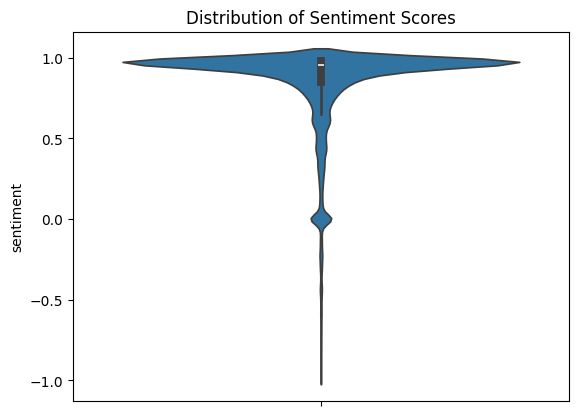

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(y=df['sentiment'])
plt.title('Distribution of Sentiment Scores')
plt.show()


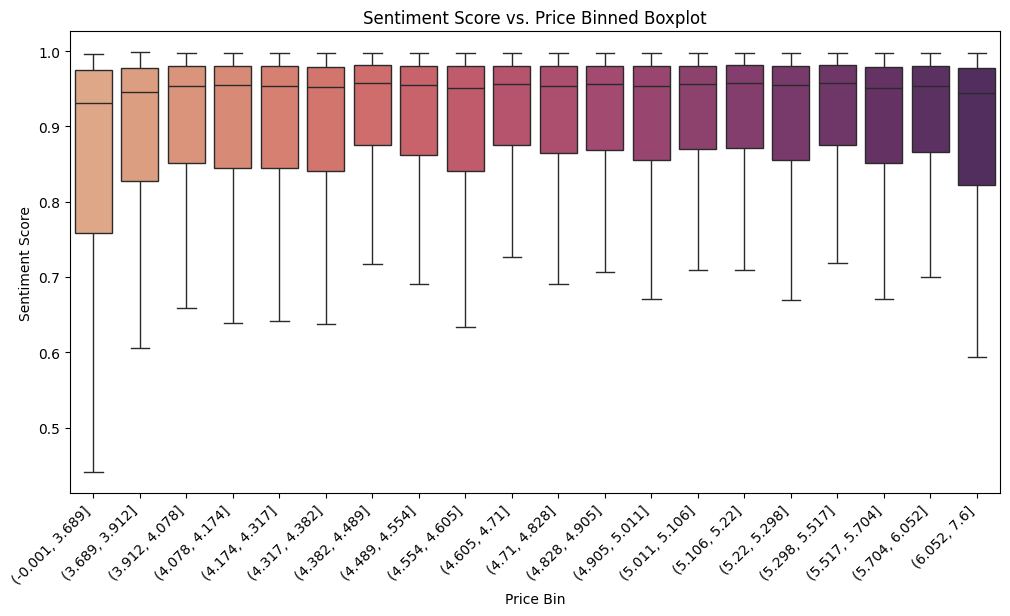

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create price bins
df['Price Bin'] = pd.qcut(df['log_price'], q=20)  # qcut creates bins with equal number of points

plt.figure(figsize=(12, 6))

# Plot boxplot for each bin
sns.boxplot(x='Price Bin', y='sentiment', data=df, palette="flare", showfliers=False)

plt.xticks(rotation=45, ha='right')
plt.title('Sentiment Score vs. Price Binned Boxplot')
plt.xlabel('Price Bin')
plt.ylabel('Sentiment Score')

plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 82 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   id                                   74111 non-null  int64         
 1   log_price                            74111 non-null  float64       
 2   amenities                            74111 non-null  object        
 3   accommodates                         74111 non-null  int64         
 4   bathrooms                            74111 non-null  float64       
 5   cleaning_fee                         74111 non-null  bool          
 6   description                          74111 non-null  object        
 7   host_has_profile_pic                 74111 non-null  bool          
 8   host_identity_verified               74111 non-null  bool          
 9   host_response_rate                   74111 non-null  float64       
 10  host_since

# Ammenities Analysis

## Obtaining comma-separated list of amenities
From the way it is formatted, we see that if we ignore the braces and the quotes, we will get a comma-separated list of amenitites.

In [ ]:
# Function to clean the amenities list
def clean_amenities(amenities):
    # Remove the curly braces and quotes
    cleaned_amenities = amenities.replace('{', '').replace('}', '').replace('"', '')
    return cleaned_amenities

# Apply the cleaning function to the amenities column
df['cleaned_amenities'] = df['amenities'].apply(clean_amenities)

# Display the dataset with cleaned amenities
df

id  log_price                                          amenities  \
0       6901257   5.010635  {"Wireless Internet","Air conditioning",Kitche...   
1       6304928   5.129899  {"Wireless Internet","Air conditioning",Kitche...   
2       7919400   4.976734  {TV,"Cable TV","Wireless Internet","Air condit...   
3      13418779   6.620073  {TV,"Cable TV",Internet,"Wireless Internet",Ki...   
4       3808709   4.744932  {TV,Internet,"Wireless Internet","Air conditio...   
...         ...        ...                                                ...   
74106  14549287   4.605170                                                 {}   
74107  13281809   5.043425  {TV,"Cable TV",Internet,"Wireless Internet",Ki...   
74108  18688039   5.220356  {TV,Internet,"Wireless Internet","Air conditio...   
74109  17045948   5.273000  {TV,"Wireless Internet","Air conditioning",Kit...   
74110   3534845   4.852030  {TV,Internet,"Wireless Internet",Kitchen,"Free...   

       accommodates  bathrooms  cleaning_fee  \
0                 3        1.0          True   
1                 7        1.0          True   
2                 5        1.0          True   
3                 4        1.0          True   
4                 2        1.0          True   
...             ...        ...           ...   
74106             1        1.0         False   
74107             4        2.0          True   
74108             5        1.0          True   
74109             2        1.0          True   
74110             4        1.0         False   

                                             description  \
0      Beautiful, sunlit brownstone 1-bedroom in the ...   
1      Enjoy travelling during your stay in Manhattan...   
2      The Oasis comes complete with a full backyard ...   
3      This light-filled home-away-from-home is super...   
4      Cool, cozy, and comfortable studio located in ...   
...                                                  ...   
74106                          one room in bushwick apt    
74107  Located on the Pacific Coast Highway, this apa...   
74108  A modern apartment located in East Williamsbur...   
74109  Fully renovated, designer's studio located in ...   
74110  You will stay-aboard the Island Trader at one ...   

       host_has_profile_pic  host_identity_verified  host_response_rate  ...  \
0                      True                    True             0.94352  ...   
1                      True                   False             1.00000  ...   
2                      True                    True             1.00000  ...   
3                      True                    True             0.94352  ...   
4                      True                    True             1.00000  ...   
...                     ...                     ...                 ...  ...   
74106                  True                    True             0.94352  ...   
74107                  True                   False             1.00000  ...   
74108                  True                    True             1.00000  ...   
74109                  True                   False             1.00000  ...   
74110                  True                    True             1.00000  ...   

      cancellation_policy_moderate  cancellation_policy_strict  \
0                            False                        True   
1                            False                        True   
2                             True                       False   
3                            False                       False   
4                             True                       False   
...                            ...                         ...   
74106                        False                       False   
74107                         True                       False   
74108                         True                       False   
74109                        False                        True   
74110                         True                     

## Obtaining list of unique amenities

To get a list of all the unique amenities across the dataset, we can follow these steps:

1. Split the cleaned amenities into individual items.
2. Flatten the list to combine all amenities from all rows.
3. Get the unique amenities by converting the list to a set.

In [ ]:
# Split the cleaned amenities into individual items
df['amenities_list'] = df['cleaned_amenities'].apply(lambda x: x.split(','))

# Flatten the list of lists into a single list of amenities
all_amenities = [item.strip() for sublist in df['amenities_list'] for item in sublist]

# Get the unique amenities
unique_amenities = sorted(set(all_amenities))

# Display the unique amenities
for amenity in unique_amenities:
    print(amenity)


24-hour check-in
Accessible-height bed
Accessible-height toilet
Air conditioning
Air purifier
BBQ grill
Baby bath
Baby monitor
Babysitter recommendations
Bath towel
Bathtub
Bathtub with shower chair
Beach essentials
Beachfront
Bed linens
Body soap
Breakfast
Buzzer/wireless intercom
Cable TV
Carbon monoxide detector
Cat(s)
Changing table
Children’s books and toys
Children’s dinnerware
Cleaning before checkout
Coffee maker
Cooking basics
Crib
Disabled parking spot
Dishes and silverware
Dishwasher
Dog(s)
Doorman
Doorman Entry
Dryer
EV charger
Elevator
Elevator in building
Essentials
Ethernet connection
Extra pillows and blankets
Family/kid friendly
Fire extinguisher
Fireplace guards
Firm matress
Firm mattress
First aid kit
Fixed grab bars for shower & toilet
Flat
Flat smooth pathway to front door
Free parking on premises
Free parking on street
Game console
Garden or backyard
Grab-rails for shower and toilet
Ground floor access
Gym
Hair dryer
Hand or paper towel
Hand soap
Handheld shower 

## Combining Repeated Amenities

Key observations:

- Cable TV and TV can be unified.
- Doorman and Doorman Entry are likely the same amenity.
- Firm matress and Firm mattress are duplicates (with a typo in one of them).
- Elevator and Elevator in building seem to refer to the same feature.
- Grab-rails for shower and toilet and Fixed grab bars for shower & toilet describe the same feature.
- Internet, Ethernet connection, Pocket wifi and Wireless Internet are related; often, "Internet" includes both wired and wireless, so they could be combined depending on context.
- Smart lock and Smartlock are duplicates.
- Washer and Washer / Dryer could be split into just "Washer" and "Dryer" as needed.
- Wide clearance to shower & toilet and Wide clearance to shower and toilet are duplicates (just a difference in the conjunction used).
- Wide clearance to bed, Wide doorway, Wide entryway, and Wide hallway clearance are all related to accessibility but refer to different aspects.
- Flat smooth pathway to front door and smooth pathway to front door are same

So, let us combine them together!

In [ ]:
df1=df.copy()
df1

id  log_price                                          amenities  \
0       6901257   5.010635  {"Wireless Internet","Air conditioning",Kitche...   
1       6304928   5.129899  {"Wireless Internet","Air conditioning",Kitche...   
2       7919400   4.976734  {TV,"Cable TV","Wireless Internet","Air condit...   
3      13418779   6.620073  {TV,"Cable TV",Internet,"Wireless Internet",Ki...   
4       3808709   4.744932  {TV,Internet,"Wireless Internet","Air conditio...   
...         ...        ...                                                ...   
74106  14549287   4.605170                                                 {}   
74107  13281809   5.043425  {TV,"Cable TV",Internet,"Wireless Internet",Ki...   
74108  18688039   5.220356  {TV,Internet,"Wireless Internet","Air conditio...   
74109  17045948   5.273000  {TV,"Wireless Internet","Air conditioning",Kit...   
74110   3534845   4.852030  {TV,Internet,"Wireless Internet",Kitchen,"Free...   

       accommodates  bathrooms  cleaning_fee  \
0                 3        1.0          True   
1                 7        1.0          True   
2                 5        1.0          True   
3                 4        1.0          True   
4                 2        1.0          True   
...             ...        ...           ...   
74106             1        1.0         False   
74107             4        2.0          True   
74108             5        1.0          True   
74109             2        1.0          True   
74110             4        1.0         False   

                                             description  \
0      Beautiful, sunlit brownstone 1-bedroom in the ...   
1      Enjoy travelling during your stay in Manhattan...   
2      The Oasis comes complete with a full backyard ...   
3      This light-filled home-away-from-home is super...   
4      Cool, cozy, and comfortable studio located in ...   
...                                                  ...   
74106                          one room in bushwick apt    
74107  Located on the Pacific Coast Highway, this apa...   
74108  A modern apartment located in East Williamsbur...   
74109  Fully renovated, designer's studio located in ...   
74110  You will stay-aboard the Island Trader at one ...   

       host_has_profile_pic  host_identity_verified  host_response_rate  ...  \
0                      True                    True             0.94352  ...   
1                      True                   False             1.00000  ...   
2                      True                    True             1.00000  ...   
3                      True                    True             0.94352  ...   
4                      True                    True             1.00000  ...   
...                     ...                     ...                 ...  ...   
74106                  True                    True             0.94352  ...   
74107                  True                   False             1.00000  ...   
74108                  True                    True             1.00000  ...   
74109                  True                   False             1.00000  ...   
74110                  True                    True             1.00000  ...   

      cancellation_policy_strict  cancellation_policy_super_strict_30  \
0                           True                                False   
1                           True                                False   
2                          False                                False   
3                          False                                False   
4                          False                                False   
...                          ...                                  ...   
74106                      False                                False   
74107                      False                                False   
74108                      False                                False   
74109                       True                   

In [ ]:
# Create a mapping dictionary
amenities_mapping = {
    "TV": ["Cable TV", "TV"],
    "Smart lock": ["Smart lock", "Smartlock"],
    "Doorman": ["Doorman", "Doorman Entry"],
    "Firm mattress": ["Firm matress", "Firm mattress"],
    "Elevator": ["Elevator", "Elevator in building"],
    "Grab-rails for shower and toilet": ["Grab-rails for shower and toilet", "Fixed grab bars for shower & toilet"],
    "Wide clearance to shower and toilet": ["Wide clearance to shower & toilet", "Wide clearance to shower and toilet"],
    "Washer": ["Washer", "Washer / Dryer"],
    "Dryer": ["Dryer", "Washer / Dryer"],
    "Wide clearance": ["Wide clearance to bed", "Wide doorway", "Wide entryway", "Wide hallway clearance"],
    "Internet": ["Wireless Internet", "Internet", "Ethernet connection", "Pocket wifi"],
    "Flat smooth pathway to front door": ["Flat smooth pathway to front door", "smooth pathway to front door"]
}

# Function to map amenities to their unified categories
def map_amenities(amenities_list):
    amenities_list = amenities_list.split(',')
    mapped_amenities = []
    for amenity in amenities_list:
        amenity = amenity.strip()
        for key, values in amenities_mapping.items():
            if amenity in values:
                mapped_amenities.append(key)
                break
        else:  # If the amenity isn't in the mapping, keep it as is
            mapped_amenities.append(amenity)
    return ', '.join(sorted(set(mapped_amenities)))

# Apply the mapping to the cleaned_amenities column
df['unified_amenities'] = df['cleaned_amenities'].apply(map_amenities)

# Split the unified amenities into individual items
df['unified_amenities_list'] = df['unified_amenities'].apply(lambda x: x.split(','))

# Flatten the list of lists into a single list of amenities
all_amenities = [item.strip() for sublist in df['unified_amenities_list'] for item in sublist]

# Get the unique amenities
unique_amenities = sorted(set(all_amenities))

# Display the unique amenities
for amenity in unique_amenities:
    print(amenity)

# Storing the unique amenities list separately before we categorize them
unique_amenities_df=df[['id','log_price','unified_amenities']]

# displaying it
unique_amenities_df


24-hour check-in
Accessible-height bed
Accessible-height toilet
Air conditioning
Air purifier
BBQ grill
Baby bath
Baby monitor
Babysitter recommendations
Bath towel
Bathtub
Bathtub with shower chair
Beach essentials
Beachfront
Bed linens
Body soap
Breakfast
Buzzer/wireless intercom
Carbon monoxide detector
Cat(s)
Changing table
Children’s books and toys
Children’s dinnerware
Cleaning before checkout
Coffee maker
Cooking basics
Crib
Disabled parking spot
Dishes and silverware
Dishwasher
Dog(s)
Doorman
Dryer
EV charger
Elevator
Essentials
Extra pillows and blankets
Family/kid friendly
Fire extinguisher
Fireplace guards
Firm mattress
First aid kit
Flat
Flat smooth pathway to front door
Free parking on premises
Free parking on street
Game console
Garden or backyard
Grab-rails for shower and toilet
Ground floor access
Gym
Hair dryer
Hand or paper towel
Hand soap
Handheld shower head
Hangers
Heating
High chair
Host greets you
Hot tub
Hot water
Hot water kettle
Indoor fireplace
Internet
Iron

id  log_price                                  unified_amenities
0       6901257   5.010635  Air conditioning, Essentials, Family/kid frien...
1       6304928   5.129899  Air conditioning, Dryer, Essentials, Family/ki...
2       7919400   4.976734  Air conditioning, Breakfast, Buzzer/wireless i...
3      13418779   6.620073  Buzzer/wireless intercom, Carbon monoxide dete...
4       3808709   4.744932  Air conditioning, Carbon monoxide detector, El...
...         ...        ...                                                ...
74106  14549287   4.605170                                                   
74107  13281809   5.043425  Dryer, Essentials, Family/kid friendly, Free p...
74108  18688039   5.220356  Air conditioning, Bed linens, Buzzer/wireless ...
74109  17045948   5.273000  Air conditioning, Carbon monoxide detector, Dr...
74110   3534845   4.852030  24-hour check-in, Carbon monoxide detector, Es...

[74111 rows x 3 columns]

## Wordcloud

### What is a Wordcloud?

A **Wordcloud** is a visual representation of text data where the size of each word indicates its frequency or importance. The more frequently a word appears in our data, the larger and bolder it will be in the wordcloud.

### When to Use a Wordcloud?

Wordclouds are particularly helpful when we want to quickly identify the most common words or terms in a dataset. For example, in our case with amenities, a wordcloud can help us visually identify which amenities appear most frequently across all properties. This can be a useful exploratory tool to get a sense of what features are most common or most highlighted in our listings.

### Limitations of Wordclouds

While wordclouds are visually appealing and useful for quick insights, they have some limitations:
- **Context**: Wordclouds do not provide context around the words. We won't see how words relate to each other or to other variables in our dataset.
- **Quantitative Analysis**: Wordclouds are not suitable for quantitative analysis. They provide a qualitative, visual summary rather than precise metrics.
- **Overrepresentation**: Common but less meaningful words can dominate the wordcloud, potentially obscuring more relevant information.

<hr>

To create a wordcloud visualization from the `unified_amenities` column in our `unique_amenities_df` DataFrame, we'll want to follow these steps:

### Steps to Create the Wordcloud

1. **Preprocess the Data**:
   - We'll need to join all the amenities into a single string so that the wordcloud can generate the visualization based on the frequency of each word (amenity).

2. **Generate and Display the Wordcloud**:
   - Use the `WordCloud` class from the `wordcloud` library to generate the wordcloud, and `matplotlib` to display it.

### Outcome:
This code will produce a wordcloud that visually represents the frequency of each amenity in our dataset, with more frequently occurring amenities appearing larger.


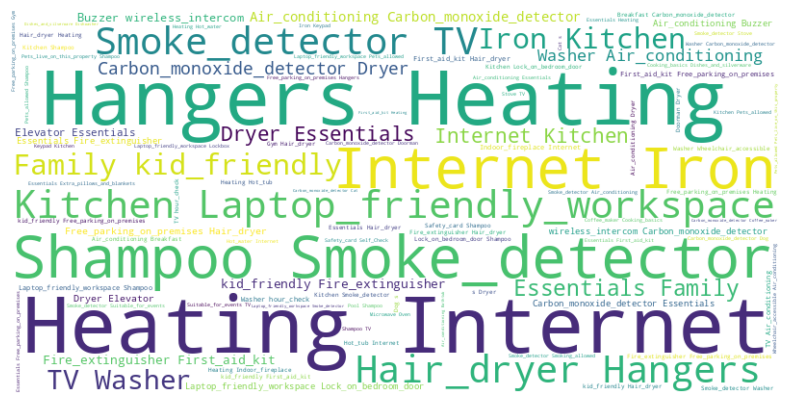

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Preprocess 'unified_amenities' column, filter out specific unwanted amenities
preprocessed_amenities = unique_amenities_df['unified_amenities'].apply(
    lambda x: ' '.join([
        amenity.strip().replace(' ', '_') for amenity in x.split(',')
        if amenity.strip() not in ["translation missing: en.hosting_amenity_49", "translation missing: en.hosting_amenity_50"]
    ])
)

# Combine all amenities into one string
all_amenities_text = ' '.join(preprocessed_amenities)

# Generate the wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_amenities_text)

# Display the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Categorizing Amenities

To group these amenities into categories, we'll need to use a logical approach to categorize them based on their functionality and type. Here's a proposed categorization:

### Proposed Categories

#### 1. **Safety & Accessibility:**
- 24-hour check-in
- Carbon monoxide detector
- Disabled parking spot
- Doorman
- Fire extinguisher
- First aid kit
- Safety card
- Smoke detector
- Stair gates
- Step-free access
- Well-lit path to entrance
- Wheelchair accessible
- Flat smooth pathway to front door
- Accessible-height bed
- Accessible-height toilet
- Wide clearance
- Path to entrance lit at night

#### 2. **Entertainment & Electronics:**
- TV
- Game console
- Internet
- Laptop friendly workspace

#### 3. **Basic Amenities:**
- Air conditioning
- Heating
- Essentials
- Bed linens
- Extra pillows and blankets
- Iron
- Hangers
- Firm Mattress
- Hot water kettle

#### 4. **Family & Kid-Friendly:**
- Babysitter recommendations
- Children’s books and toys
- Children’s dinnerware
- Crib
- High chair
- Pack ’n Play/travel crib
- Outlet covers
- Baby bath
- Baby monitor
- Table corner guards
- Family/kid friendly
- Changing table

#### 5. **Kitchen & Dining:**
- Coffee maker
- Cooking basics
- Dishes and silverware
- Dishwasher
- Microwave
- Oven
- Refrigerator
- Stove
- Water kettle
- BBQ grill
- Kitchen
- Breakfast

#### 6. **Health & Fitness:**
- Gym
- Air purifier

#### 7. **Pets:**
- Cat(s)
- Dog(s)
- Other pet(s)
- Pets allowed
- Pets live on this property

#### 8. **Parking:**
- Free parking on premises
- Free parking on street
- EV charger
- Paid parking off premises

#### 9. **Outdoor & Leisure:**
- Beach essentials
- Beachfront
- Garden or backyard
- Lake access
- Patio or balcony
- Pool
- Ski in/Ski out
- Hot tub
- Waterfront

#### 10. **Security & Entry:**
- Smart lock
- Keypad
- Lock on bedroom door
- Lockbox
- Self Check-In
- Host greets you

#### 11. **Bathroom Amenities:**
- Hand soap
- Shampoo
- Toilet paper
- Bath towel
- Bathtub
- Bathtub with shower chair
- Handheld shower head
- Roll-in shower with chair
- Shower chair
- Fixed grab bars for shower & toilet
- Hot Water
- Accessible-height toilet
- Body soap
- Grab-rails for shower and toilet
- Hand or paper towel

#### 12. **Special Features:**
- Fireplace guards
- Indoor fireplace
- Private bathroom
- Private entrance
- Private living room
- Single level home
- Suitable for events
- Long term stays allowed
- Luggage dropoff allowed
- Smoking allowed
- Other
- Elevator

#### 13. **Miscellaneous:**
- Room-darkening shades
- Window guards
- Smooth pathway to front door
- Cleaning before checkout
- Buzzer/wireless intercom
- Ground floor access
- Translation missing: en.hosting_amenity_49
- Translation missing: en.hosting_amenity_50

In [ ]:
df.head()

id  log_price                                          amenities  \
0   6901257   5.010635  {"Wireless Internet","Air conditioning",Kitche...   
1   6304928   5.129899  {"Wireless Internet","Air conditioning",Kitche...   
2   7919400   4.976734  {TV,"Cable TV","Wireless Internet","Air condit...   
3  13418779   6.620073  {TV,"Cable TV",Internet,"Wireless Internet",Ki...   
4   3808709   4.744932  {TV,Internet,"Wireless Internet","Air conditio...   

   accommodates  bathrooms  cleaning_fee  \
0             3        1.0          True   
1             7        1.0          True   
2             5        1.0          True   
3             4        1.0          True   
4             2        1.0          True   

                                         description  host_has_profile_pic  \
0  Beautiful, sunlit brownstone 1-bedroom in the ...                  True   
1  Enjoy travelling during your stay in Manhattan...                  True   
2  The Oasis comes complete with a full backyard ...                  True   
3  This light-filled home-away-from-home is super...                  True   
4  Cool, cozy, and comfortable studio located in ...                  True   

   host_identity_verified  host_response_rate  ...  \
0                    True             0.94352  ...   
1                   False             1.00000  ...   
2                    True             1.00000  ...   
3                    True             0.94352  ...   
4                    True             1.00000  ...   

  cancellation_policy_super_strict_60  host_tenure relevance  \
0                               False    12.462697  0.860333   
1                               False     7.230664  0.996225   
2                               False     7.879535  0.993394   
3                               False     9.399042  0.000000   
4                               False     9.533196  0.919472   

                               description_processed  sentiment  \
0  beautiful sunlit brownstone bedroom loveliest ...     0.8658   
1  enjoy travelling stay manhattan my place centr...     0.9607   
2  the oasis comes complete full backyard outdoor...     0.9524   
3  this light filled home away home super clean c...     0.8271   
4  cool cozy comfortable studio located heart cit...     0.9300   

        Price Bin                                  cleaned_amenities  \
0  (4.905, 5.011]  Wireless Internet,Air conditioning,Kitchen,Hea...   
1   (5.106, 5.22]  Wireless Internet,Air conditioning,Kitchen,Hea...   
2  (4.905, 5.011]  TV,Cable TV,Wireless Internet,Air conditioning...   
3    (6.052, 7.6]  TV,Cable TV,Internet,Wireless Internet,Kitchen...   
4   (4.71, 4.828]  TV,Internet,Wireless Internet,Air conditioning...   

                                      amenities_list  \
0  [Wireless Internet, Air conditioning, Kitchen,...   
1  [Wireless Internet, Air conditioning, Kitchen,...   
2  [TV, Cable TV, Wireless Internet, Air conditio...   
3  [TV, Cable TV, Internet, Wireless Internet, Ki...   
4  [TV, Internet, Wireless Internet, Air conditio...   

                                   unified_amenities  \
0  Air conditioning, Essentials, Family/kid frien...   
1  Air conditioning, Dryer, Essentials, Family/ki...   
2  Air conditioning, Breakfast, Buzzer/wireless i...   
3  Buzzer/wireless intercom, Carbon monoxide dete...   
4  Air conditioning, Carbon monoxide detector, El...   

                              unified_amenities_list  
0  [Air conditioning,  Essentials,  Family/kid fr...  
1  [Air conditioning,  Dryer,  Essentials,  Famil...  
2  [Air conditioning,  Breakfast,  Buzzer/wireles...  
3  [Buzzer/wireless intercom,  Carbon monoxide de...  
4  [Air conditioning,  Carbon monoxide detector, ...  

[5 rows x 86 columns]

In [ ]:
# Define the amenity categories
categories = {
    "Safety & Accessibility": [
        "24-hour check-in", "Carbon monoxide detector", "Disabled parking spot", "Doorman",
        "Fire extinguisher", "First aid kit", "Safety card", "Smoke detector", "Stair gates",
        "Step-free access", "Well-lit path to entrance", "Wheelchair accessible",
        "Flat smooth pathway to front door", "Accessible-height bed", "Accessible-height toilet",
        "Wide clearance", "Wide clearance to shower and toilet", "Path to entrance lit at night"
    ],
    "Entertainment & Electronics": [
        "TV", "Game console", "Internet", "Laptop friendly workspace"
    ],
    "Basic Amenities": [
        "Air conditioning", "Heating", "Essentials", "Bed linens",
        "Extra pillows and blankets", "Iron", "Hangers", "Firm mattress", "Hot water kettle"
    ],
    "Family & Kid-Friendly": [
        "Babysitter recommendations", "Children’s books and toys", "Children’s dinnerware",
        "Crib", "High chair", "Pack ’n Play/travel crib", "Outlet covers",
        "Baby bath", "Baby monitor", "Table corner guards", "Family/kid friendly",
        "Changing table"
    ],
    "Kitchen & Dining": [
        "Coffee maker", "Cooking basics", "Dishes and silverware", "Dishwasher",
        "Microwave", "Oven", "Refrigerator", "Stove", "Water kettle", "BBQ grill", "Kitchen",
        "Dryer", "Washer", "Breakfast"
    ],
    "Health & Fitness": [
        "Gym", "Air purifier"
    ],
    "Pets": [
        "Cat(s)", "Dog(s)", "Other pet(s)", "Pets allowed", "Pets live on this property"
    ],
    "Parking": [
        "Free parking on premises", "Free parking on street", "EV charger", "Paid parking off premises"
    ],
    "Outdoor & Leisure": [
        "Beach essentials", "Beachfront", "Garden or backyard", "Lake access",
        "Patio or balcony", "Pool", "Ski in/Ski out", "Hot tub", "Waterfront"
    ],
    "Security & Entry": [
        "Smart lock", "Keypad", "Lock on bedroom door", "Lockbox",
        "Self Check-In", "Host greets you"
    ],
    "Bathroom Amenities": [
        "Hand soap", "Shampoo", "Toilet paper", "Bath towel", "Bathtub",
        "Bathtub with shower chair", "Handheld shower head", "Roll-in shower with chair",
        "Shower chair", "Fixed grab bars for shower & toilet", "Hair dryer", "Hot water",
        "Accessible-height toilet", "Body soap", "Grab-rails for shower and toilet",
        "Hand or paper towel"
    ],
    "Special Features": [
        "Fireplace guards", "Indoor fireplace", "Private bathroom", "Private entrance",
        "Private living room", "Single level home", "Suitable for events",
        "Long term stays allowed", "Luggage dropoff allowed", "Smoking allowed",
        "Other", "Elevator"
    ],
    "Miscellaneous": [
        "Room-darkening shades", "Window guards",
        "Smooth pathway to front door", "Cleaning before checkout",
        "Buzzer/wireless intercom", "translation missing: en.hosting_amenity_50",
        "translation missing: en.hosting_amenity_49", "Ground floor access"
    ],
    "Uncategorized": []
}

# Initialize a new DataFrame with category columns
category_columns = {category: [] for category in categories.keys()}

# Function to categorize amenities and fill columns
def categorize_and_fill(amenities_list):
    row_dict = {category: '' for category in categories.keys()}
    for amenity in amenities_list.split(','):
        amenity = amenity.strip()
        categorized = False
        for category, items in categories.items():
            if amenity in items:
                if row_dict[category]:
                    row_dict[category] += ', ' + amenity
                else:
                    row_dict[category] = amenity
                categorized = True
                break
        if not categorized:
            if row_dict['Uncategorized']:
                row_dict['Uncategorized'] += ', ' + amenity
            else:
                row_dict['Uncategorized'] = amenity
    return pd.Series(row_dict)

# Apply the categorization and transformation
categorized_df = df['unified_amenities'].apply(categorize_and_fill)


In [ ]:

df = pd.concat([df, categorized_df], axis=1)


In order to ensure that no feature is uncategorized, we display all unique amenities in the Uncategorized column

In [ ]:
# Extract the 'Uncategorized' column from the final DataFrame
uncategorized_amenities = df['Uncategorized']

# Flatten the list of all amenities in 'Uncategorized'
all_uncategorized_amenities = [item.strip() for sublist in uncategorized_amenities.dropna().apply(lambda x: x.split(',')).tolist() for item in sublist]

# Get unique amenities
unique_uncategorized_amenities = sorted(set(all_uncategorized_amenities))

# Display the unique amenities
for amenity in unique_uncategorized_amenities:
    print(amenity)



Flat


There are 115 features, so one-hot encoding may not be a good idea. Instead this is how we can proceed:

### 1. **One-Hot Encode the "Special Features"**
   - This will create a binary column for each special feature, indicating its presence or absence in each homestay listing.

### 2. **Count the Amenities in Other Categories**
   - For each category, count the number of amenities present in each listing. This will reduce the dimensionality and still capture the information.

### 3. **Combine the Features**
   - Combine the one-hot encoded "Special Features" with the counts of other amenities to form a final dataset for analysis.


In [ ]:
# Step 1: One-Hot Encode the "Special Features"
special_features_df = categorized_df['Special Features'].str.get_dummies(sep=', ')

# Step 2: Count the amenities in other categories
for category in categories.keys():
    if category != 'Special Features':
        categorized_df[category + '_count'] = categorized_df[category].apply(lambda x: len(x.split(', ')) if pd.notna(x) else 0)

# Step 3: Combine the features
final_df = pd.concat([df, special_features_df, categorized_df[[cat + '_count' for cat in categories.keys() if cat != 'Special Features']]], axis=1)

# Display the final dataset
final_df


id  log_price                                          amenities  \
0       6901257   5.010635  {"Wireless Internet","Air conditioning",Kitche...   
1       6304928   5.129899  {"Wireless Internet","Air conditioning",Kitche...   
2       7919400   4.976734  {TV,"Cable TV","Wireless Internet","Air condit...   
3      13418779   6.620073  {TV,"Cable TV",Internet,"Wireless Internet",Ki...   
4       3808709   4.744932  {TV,Internet,"Wireless Internet","Air conditio...   
...         ...        ...                                                ...   
74106  14549287   4.605170                                                 {}   
74107  13281809   5.043425  {TV,"Cable TV",Internet,"Wireless Internet",Ki...   
74108  18688039   5.220356  {TV,Internet,"Wireless Internet","Air conditio...   
74109  17045948   5.273000  {TV,"Wireless Internet","Air conditioning",Kit...   
74110   3534845   4.852030  {TV,Internet,"Wireless Internet",Kitchen,"Free...   

       accommodates  bathrooms  cleaning_fee  \
0                 3        1.0          True   
1                 7        1.0          True   
2                 5        1.0          True   
3                 4        1.0          True   
4                 2        1.0          True   
...             ...        ...           ...   
74106             1        1.0         False   
74107             4        2.0          True   
74108             5        1.0          True   
74109             2        1.0          True   
74110             4        1.0         False   

                                             description  \
0      Beautiful, sunlit brownstone 1-bedroom in the ...   
1      Enjoy travelling during your stay in Manhattan...   
2      The Oasis comes complete with a full backyard ...   
3      This light-filled home-away-from-home is super...   
4      Cool, cozy, and comfortable studio located in ...   
...                                                  ...   
74106                          one room in bushwick apt    
74107  Located on the Pacific Coast Highway, this apa...   
74108  A modern apartment located in East Williamsbur...   
74109  Fully renovated, designer's studio located in ...   
74110  You will stay-aboard the Island Trader at one ...   

       host_has_profile_pic  host_identity_verified  host_response_rate  ...  \
0                      True                    True             0.94352  ...   
1                      True                   False             1.00000  ...   
2                      True                    True             1.00000  ...   
3                      True                    True             0.94352  ...   
4                      True                    True             1.00000  ...   
...                     ...                     ...                 ...  ...   
74106                  True                    True             0.94352  ...   
74107                  True                   False             1.00000  ...   
74108                  True                    True             1.00000  ...   
74109                  True                   False             1.00000  ...   
74110                  True                    True             1.00000  ...   

      Family & Kid-Friendly_count  Kitchen & Dining_count  \
0                               1                       1   
1                               1                       3   
2                               1                       2   
3                               1                       3   
4                               1                       1   
...                           ...                     ...   
74106                           1                       1   
74107                           1                       3   
74108                           1                      11   
74109                           1                       3   
74110                           1                       1   

      Health & Fitness_count  Pets_count  Parkin

## Correlation Analysis

To see which amenities are associated with higher or lower prices, we'll compute the correlation:

In [ ]:

correlation_matrix = final_df.select_dtypes(include=np.number).corr()

# Extract the correlation of all features with log_price
price_correlation = correlation_matrix['log_price'].sort_values(ascending=False)

# Display the top features correlated with price
price_correlation


log_price                            1.000000
accommodates                         0.567574
bedrooms                             0.473041
beds                                 0.442040
bathrooms                            0.355223
Entertainment & Electronics_count    0.238023
Indoor fireplace                     0.170569
Cluster                              0.141149
Bathroom Amenities_count             0.134070
Kitchen & Dining_count               0.128095
Safety & Accessibility_count         0.119581
Suitable for events                  0.115668
Private entrance                     0.114143
Basic Amenities_count                0.113711
Elevator                             0.110254
Outdoor & Leisure_count              0.083379
Family & Kid-Friendly_count          0.081596
host_tenure                          0.078333
review_scores_rating                 0.074822
Fireplace guards                     0.041597
Security & Entry_count               0.039766
sentiment                            0.023511
Single level home                    0.013745
Long term stays allowed              0.007587
Parking_count                        0.005180
Luggage dropoff allowed              0.003917
Health & Fitness_count              -0.001810
latitude                            -0.002193
Other                               -0.002983
Private bathroom                    -0.003194
host_response_rate                  -0.005748
id                                  -0.007178
number_of_reviews                   -0.032470
longitude                           -0.047529
Private living room                 -0.050782
Pets_count                          -0.060110
Smoking allowed                     -0.067840
relevance                           -0.091750
Miscellaneous_count                 -0.173106
Uncategorized_count                       NaN
Name: log_price, dtype: float64

## Correlation Matrix

Visualizing the correlations can help us interpret the results better:

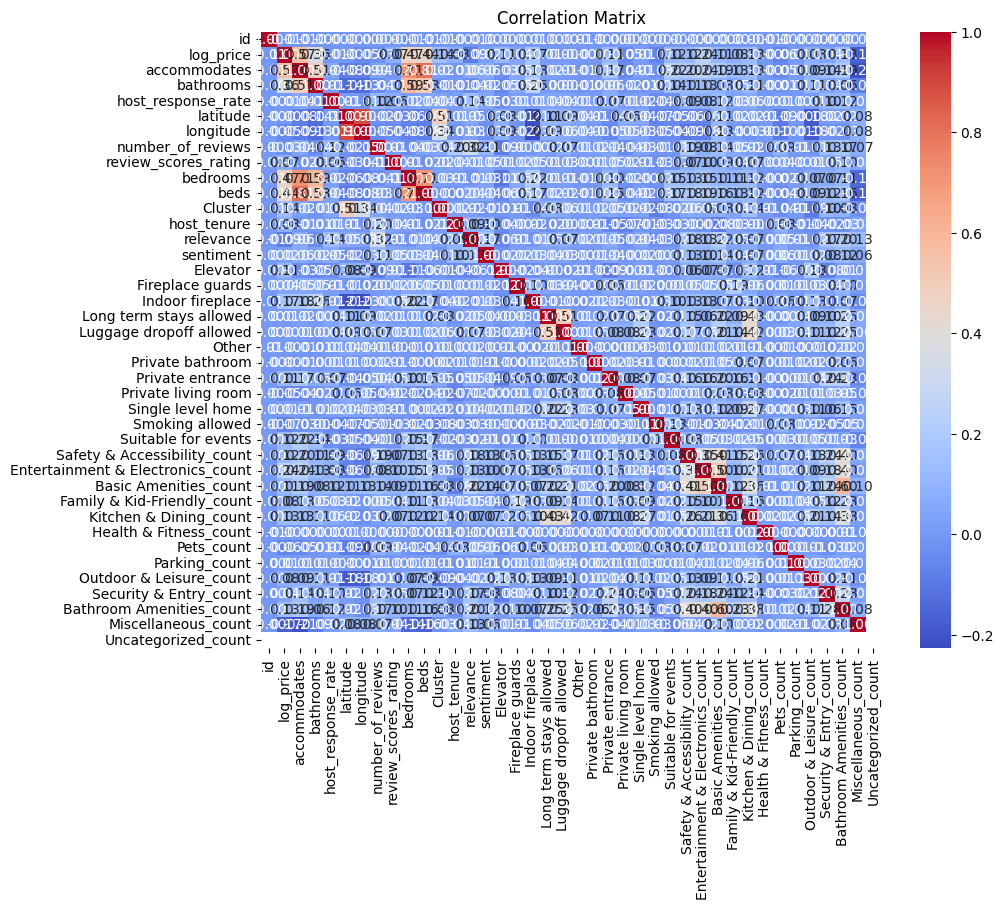

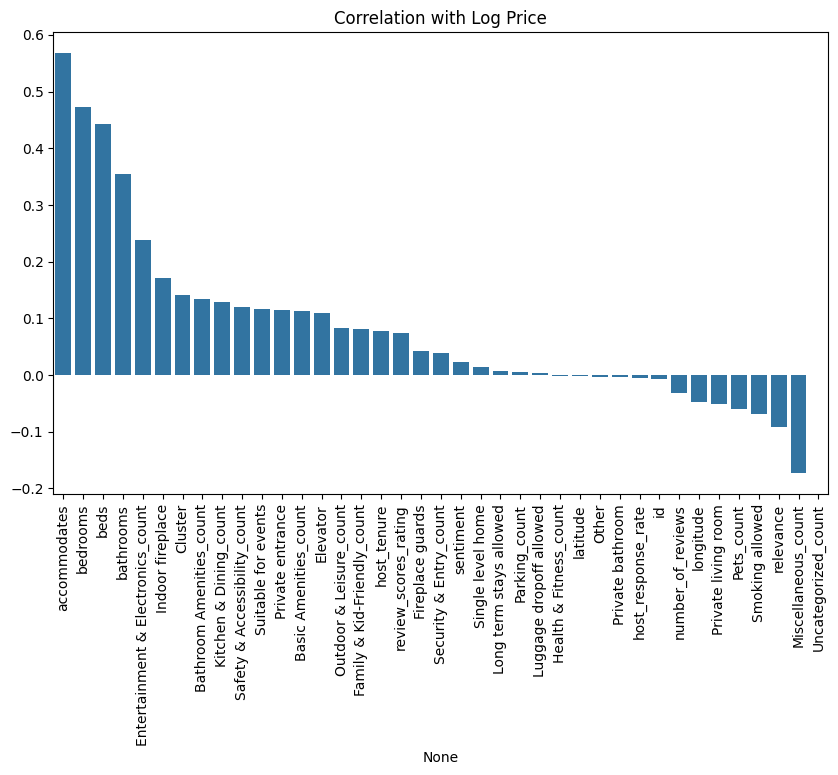

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a heatmap of the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Alternatively, plot the top correlated features with price
plt.figure(figsize=(10, 6))
sns.barplot(x=price_correlation.index[1:], y=price_correlation.values[1:])
plt.title('Correlation with Log Price')
plt.xticks(rotation=90)
plt.show()


Let us try the same with actual prices instead of log of prices.

In [ ]:
import numpy as np

# Convert log_price back to the actual price
final_df['price'] = np.exp(final_df['log_price'])

# Display to verify
final_df[['id', 'log_price', 'price']]


id  log_price  price
0       6901257   5.010635  150.0
1       6304928   5.129899  169.0
2       7919400   4.976734  145.0
3      13418779   6.620073  750.0
4       3808709   4.744932  115.0
...         ...        ...    ...
74106  14549287   4.605170  100.0
74107  13281809   5.043425  155.0
74108  18688039   5.220356  185.0
74109  17045948   5.273000  195.0
74110   3534845   4.852030  128.0

[74111 rows x 3 columns]

In [ ]:
# Calculate the correlation between features and the actual price
correlation_matrix = final_df.select_dtypes(include=np.number).corr()

# Extract the correlation of all features with the actual price
price_correlation = correlation_matrix['price'].sort_values(ascending=False)

# Display the top features correlated with price
price_correlation


price                                1.000000
log_price                            0.840001
accommodates                         0.519326
bedrooms                             0.494422
bathrooms                            0.459253
beds                                 0.433150
Indoor fireplace                     0.185207
Entertainment & Electronics_count    0.154874
Suitable for events                  0.144741
Cluster                              0.108294
Kitchen & Dining_count               0.099024
Outdoor & Leisure_count              0.083117
Safety & Accessibility_count         0.079964
Private entrance                     0.073153
Bathroom Amenities_count             0.071743
Family & Kid-Friendly_count          0.059933
Elevator                             0.055745
Basic Amenities_count                0.055045
review_scores_rating                 0.047114
Fireplace guards                     0.034048
host_tenure                          0.018556
Parking_count                        0.006678
Security & Entry_count               0.005412
Single level home                    0.001550
Long term stays allowed             -0.000539
Private bathroom                    -0.001755
Luggage dropoff allowed             -0.001767
Health & Fitness_count              -0.002045
id                                  -0.002698
sentiment                           -0.003079
Other                               -0.006939
host_response_rate                  -0.017142
latitude                            -0.031344
Smoking allowed                     -0.031776
Private living room                 -0.036881
Pets_count                          -0.045467
longitude                           -0.057601
number_of_reviews                   -0.070956
Miscellaneous_count                 -0.131638
relevance                           -0.145520
Uncategorized_count                       NaN
Name: price, dtype: float64

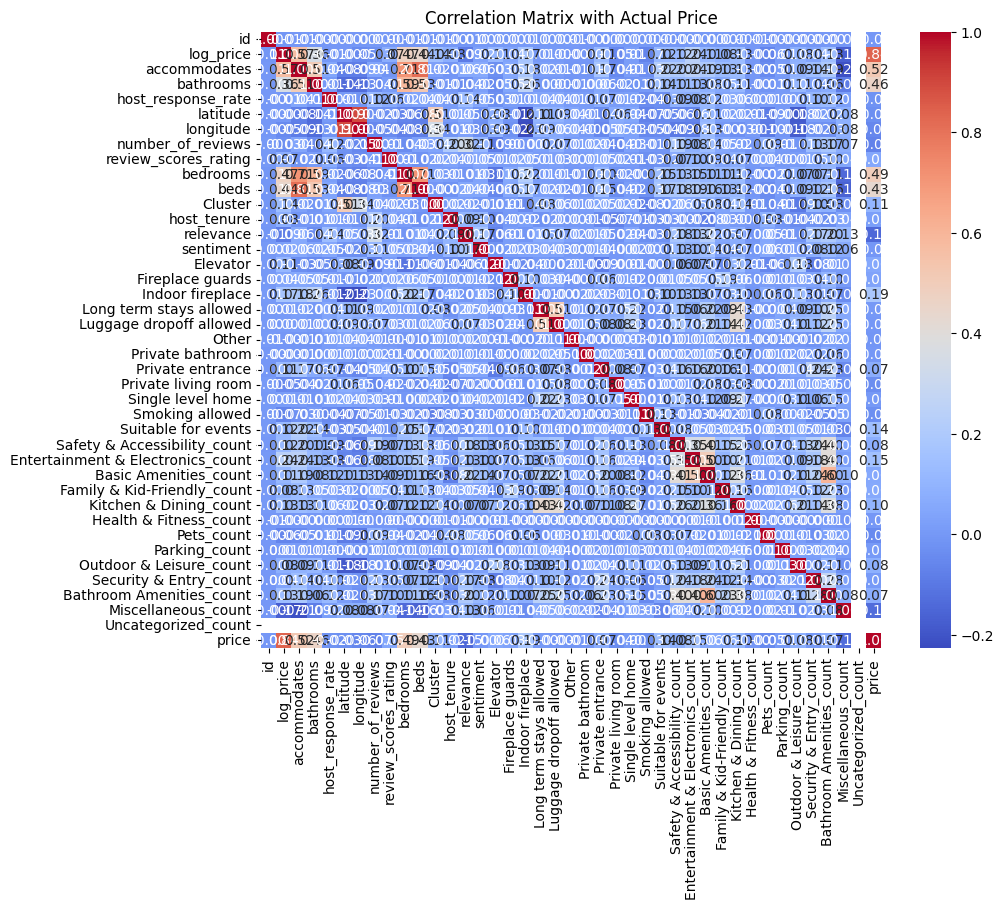

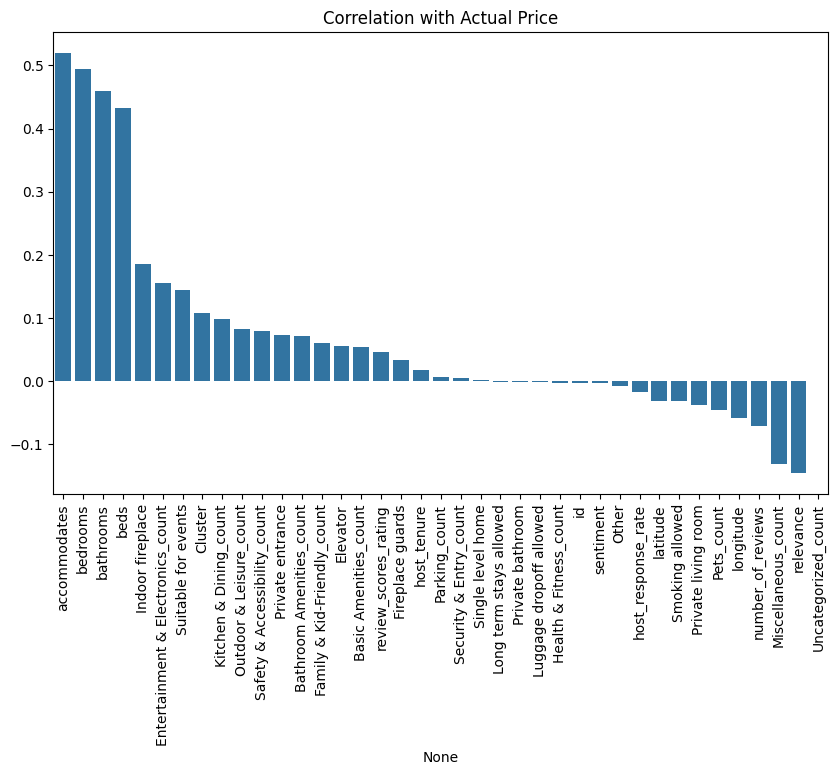

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a heatmap of the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix with Actual Price')
plt.show()

# Alternatively, plot the top correlated features with price
plt.figure(figsize=(10, 6))
sns.barplot(x=price_correlation.index[2:], y=price_correlation.values[2:])
plt.title('Correlation with Actual Price')
plt.xticks(rotation=90)
plt.show()


## Embeddings using a transformer-based model

When we talk about creating embeddings using a transformer-based model, we’re essentially converting words or phrases (like our amenities) into numerical representations in a high-dimensional space. In this space, similar words or phrases (those that have related meanings) will be located close to each other. This is useful because it allows us to measure the "distance" between different amenities, which helps us understand how similar they are based on their embeddings.

### What Does This Mean?

1. **Embedding Creation**: First, we use a pre-trained transformer model (like BERT) to create embeddings for each amenity. This model is already trained on a vast amount of text data, so it understands the context and meaning of words.

2. **Similarity Measurement**: Once we have the embeddings, we can calculate the distance (usually using cosine similarity) between these vectors. Amenities that are close to each other in this space are considered similar. For example, "TV" and "Game console" might end up being close to each other because they both relate to entertainment.

3. **Clustering**: Based on these distances, we can group similar amenities together, potentially even discovering new categories that we didn’t think of manually.

This approach could help us automatically discover relationships between amenities, possibly leading to a more insightful analysis and even suggesting new categories based on the embeddings.

<hr>

We shall use the list `unique_amenities` to perform Embedding-based Categorization

In [ ]:
from transformers import BertTokenizer, BertModel
import torch
from sklearn.cluster import KMeans

In [ ]:
#Initialize BERT Model and Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Ensure model is in evaluation mode
model.eval()


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [ ]:
# Generate embeddings
def get_amenity_embeddings(amenities_list):
    # Tokenize and get embeddings
    tokens = tokenizer(amenities_list, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**tokens)

    # Use the mean of the token embeddings as the sentence embedding
    embeddings = outputs.last_hidden_state.mean(dim=1)
    return embeddings.numpy()

embeddings = get_amenity_embeddings(unique_amenities)


In [ ]:
# Apply KMeans clustering
num_clusters = 15  # You can adjust the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(embeddings)

# Create a DataFrame for amenities and their cluster labels
amenities_clusters = pd.DataFrame({
    'Amenity': unique_amenities,
    'Cluster': clusters
})

# Group amenities by their cluster label
clustered_amenities = amenities_clusters.groupby('Cluster')['Amenity'].apply(lambda x: ', '.join(x)).reset_index()

# Display the clustered amenities
clustered_amenities[['Amenity']]



Amenity
0   24-hour check-in, Long term stays allowed, Sel...
1   Breakfast, Changing table, Cleaning before che...
2   Disabled parking spot, Free parking on premise...
3   Bathtub with shower chair, Dishwasher, Grab-ra...
4   , Flat, Heating, Iron, Microwave, Other, Oven,...
5   Bath towel, Bathtub, Body soap, Dryer, Hair dr...
6   Air conditioning, Air purifier, Carbon monoxid...
7   Accessible-height toilet, Beachfront, Ground f...
8                        Cat(s), Dog(s), Other pet(s)
9   BBQ grill, Beach essentials, Cooking basics, E...
10  Buzzer/wireless intercom, EV charger, Game con...
11  Accessible-height bed, Baby bath, Baby monitor...
12  Bed linens, Children’s books and toys, Childre...
13  Flat smooth pathway to front door, Garden or b...
14  translation missing: en.hosting_amenity_49, tr...

## Manual vs Embedding-based Categorization

Using embeddings to categorize amenities has some distinct advantages and disadvantages over manual categorization:

### **Advantages of Embedding-Based Categorization**:
1. **Unbiased Grouping**: The model groups amenities based on actual usage and context, rather than human assumptions, which might lead to discovering relationships we hadn't thought of.
   
2. **Scalability**: As the number of amenities grows, manually categorizing them becomes increasingly difficult. Embedding-based approaches scale effortlessly.
   
3. **Context Awareness**: Transformer models capture the context in which amenities are typically used, which might group together amenities that serve similar functions, even if they don't appear similar at first glance.

4. **Adaptability**: This method can adapt to new amenities without requiring a complete overhaul of the categorization process, which is necessary with manual categorization.

### **However, Manual Categorization Also Has Its Benefits**:
1. **Human Insight**: Sometimes, human intuition and domain knowledge can group amenities in ways that are more practical or meaningful in a specific context.

2. **Simplicity**: For a smaller dataset, manual categorization might be quicker and easier to implement, without requiring complex models or computations.

3. **Interpretability**: Manually created categories are easier to understand and interpret, which might be important for stakeholders who need clear explanations.

### **Which is Better?**
- **For complex, large-scale datasets with many amenities**, embedding-based categorization might be more efficient and insightful. It can uncover hidden relationships and automate the process as the dataset grows.
  
- **For smaller datasets or when interpretability is key**, manual categorization could be preferable, especially when specific domain knowledge is required to make sense of the categories.

Given our task's nature—where we aim to correlate amenities with pricing—**manual categorization can give us a clear baseline**. While clustering using embeddings groups approximately related amenities, some group amenities seem to lack much context. Thus, we will continue our further work on the manually categorized amenities. Let us review our encoded amenities once.

In [ ]:
print(final_df.columns)
final_df

Index(['id', 'log_price', 'amenities', 'accommodates', 'bathrooms',
       'cleaning_fee', 'description', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate',
       ...
       'Kitchen & Dining_count', 'Health & Fitness_count', 'Pets_count',
       'Parking_count', 'Outdoor & Leisure_count', 'Security & Entry_count',
       'Bathroom Amenities_count', 'Miscellaneous_count',
       'Uncategorized_count', 'price'],
      dtype='object', length=126)


id  log_price                                          amenities  \
0       6901257   5.010635  {"Wireless Internet","Air conditioning",Kitche...   
1       6304928   5.129899  {"Wireless Internet","Air conditioning",Kitche...   
2       7919400   4.976734  {TV,"Cable TV","Wireless Internet","Air condit...   
3      13418779   6.620073  {TV,"Cable TV",Internet,"Wireless Internet",Ki...   
4       3808709   4.744932  {TV,Internet,"Wireless Internet","Air conditio...   
...         ...        ...                                                ...   
74106  14549287   4.605170                                                 {}   
74107  13281809   5.043425  {TV,"Cable TV",Internet,"Wireless Internet",Ki...   
74108  18688039   5.220356  {TV,Internet,"Wireless Internet","Air conditio...   
74109  17045948   5.273000  {TV,"Wireless Internet","Air conditioning",Kit...   
74110   3534845   4.852030  {TV,Internet,"Wireless Internet",Kitchen,"Free...   

       accommodates  bathrooms  cleaning_fee  \
0                 3        1.0          True   
1                 7        1.0          True   
2                 5        1.0          True   
3                 4        1.0          True   
4                 2        1.0          True   
...             ...        ...           ...   
74106             1        1.0         False   
74107             4        2.0          True   
74108             5        1.0          True   
74109             2        1.0          True   
74110             4        1.0         False   

                                             description  \
0      Beautiful, sunlit brownstone 1-bedroom in the ...   
1      Enjoy travelling during your stay in Manhattan...   
2      The Oasis comes complete with a full backyard ...   
3      This light-filled home-away-from-home is super...   
4      Cool, cozy, and comfortable studio located in ...   
...                                                  ...   
74106                          one room in bushwick apt    
74107  Located on the Pacific Coast Highway, this apa...   
74108  A modern apartment located in East Williamsbur...   
74109  Fully renovated, designer's studio located in ...   
74110  You will stay-aboard the Island Trader at one ...   

       host_has_profile_pic  host_identity_verified  host_response_rate  ...  \
0                      True                    True             0.94352  ...   
1                      True                   False             1.00000  ...   
2                      True                    True             1.00000  ...   
3                      True                    True             0.94352  ...   
4                      True                    True             1.00000  ...   
...                     ...                     ...                 ...  ...   
74106                  True                    True             0.94352  ...   
74107                  True                   False             1.00000  ...   
74108                  True                    True             1.00000  ...   
74109                  True                   False             1.00000  ...   
74110                  True                    True             1.00000  ...   

      Kitchen & Dining_count  Health & Fitness_count Pets_count  \
0                          1                       1          1   
1                          3                       1          1   
2                          2                       1          1   
3                          3                       1          1   
4                          1                       1          1   
...                      ...                     ...        ...   
74106                      1                       1          1   
74107                      3                       1          1   
74108                     11                       1          1   
74109                      3                       1          1   
74110                      1                

### **ANOVA for Feature Analysis**

To further explore the relationship between features and pricing, we use **ANOVA (Analysis of Variance)**. ANOVA is a statistical method used to determine if there are any statistically significant differences between the means of three or more independent (unrelated) groups.

#### **Objective of ANOVA:**

For our analysis, the goal is to examine how different features (both categorical and count-based) impact the pricing of listings. Specifically, ANOVA helps us understand whether different groups of listings, categorized by the presence or absence of various features, exhibit significant differences in their average prices.

#### **How It Works:**

1. **Group Formation:** We categorize our listings based on the presence or absence of each feature. For categorical features, these are binary groups (present vs. absent), and for count-based features, we may create several groups based on ranges or specific counts.

2. **Statistical Test:** ANOVA tests whether the means of the price across these different groups are significantly different. It does this by comparing the variance within each group to the variance between the groups.

3. **Result Interpretation:** ANOVA provides:
   - **F-Statistic:** This value indicates the ratio of variance between the groups to the variance within the groups. A higher F-value suggests a more significant difference between group means.
   - **P-Value:** The p-value helps us determine the statistical significance of the F-statistic. A lower p-value indicates that the observed differences in means are unlikely to have occurred by chance.

Using ANOVA, we can assess whether features significantly affect prices across different groups, which aids in understanding their impact and refining pricing strategies.

Now, let's proceed with performing ANOVA to analyze the impact of various features on accommodation prices.

In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Load your final DataFrame (assuming it's already loaded as `final_df`)

# Prepare a dictionary to store the ANOVA results
anova_results = {}

# List of columns to analyze (excluding 'id', 'log_price', and 'price')
feature_columns = final_df.columns.difference(['id', 'log_price', 'price'])

# Perform ANOVA for each feature
for feature in feature_columns:
    # Get unique values for the feature
    unique_values = final_df[feature].unique()

    # Check if there are at least two unique values
    if len(unique_values) < 2:
        print(f"Skipping feature '{feature}' due to insufficient unique values.")
        continue

    # Group prices by feature value
    groups = [final_df[final_df[feature] == value]['price'] for value in unique_values]

    # Check if there are at least two groups with data
    if any(len(group) == 0 for group in groups):
        print(f"Skipping feature '{feature}' due to empty groups.")
        continue

    # Perform ANOVA
    f_statistic, p_value = f_oneway(*groups)

    # Store the result
    anova_results[feature] = {
        'F-Statistic': f_statistic,
        'P-Value': p_value
    }

# Convert the results to a DataFrame for better readability
anova_results_df = pd.DataFrame(anova_results).T
anova_results_df.columns = ['F-Statistic', 'P-Value']

# Display the results
print(anova_results_df)

# Optional: Save the results to a CSV file
anova_results_df.to_csv('anova_results.csv')


Skipping feature 'Uncategorized_count' due to insufficient unique values.
                                   F-Statistic        P-Value
Basic Amenities_count                41.655711   4.981014e-59
Bathroom Amenities_count             56.211929   9.889790e-81
Elevator                            231.015582   4.291042e-52
Entertainment & Electronics_count   608.639781   0.000000e+00
Family & Kid-Friendly_count          29.299747   2.417459e-62
Fireplace guards                     86.013089   1.833681e-20
Health & Fitness_count                0.310012   5.776746e-01
Indoor fireplace                   2632.362027   0.000000e+00
Kitchen & Dining_count              182.056363   0.000000e+00
Long term stays allowed               0.021530   8.833456e-01
Luggage dropoff allowed               0.231494   6.304198e-01
Miscellaneous_count                 322.489661   0.000000e+00
Other                                 3.568340   5.889506e-02
Outdoor & Leisure_count             109.103295  3.192581e-

Visualizing the results of ANOVA can help us quickly grasp which features have significant effects on the price. Here’s how we can visualize the ANOVA results effectively:

### **1. Bar Plot of F-Statistics**

A bar plot can show the F-Statistics for each feature, helping us identify which features have the most significant impact.

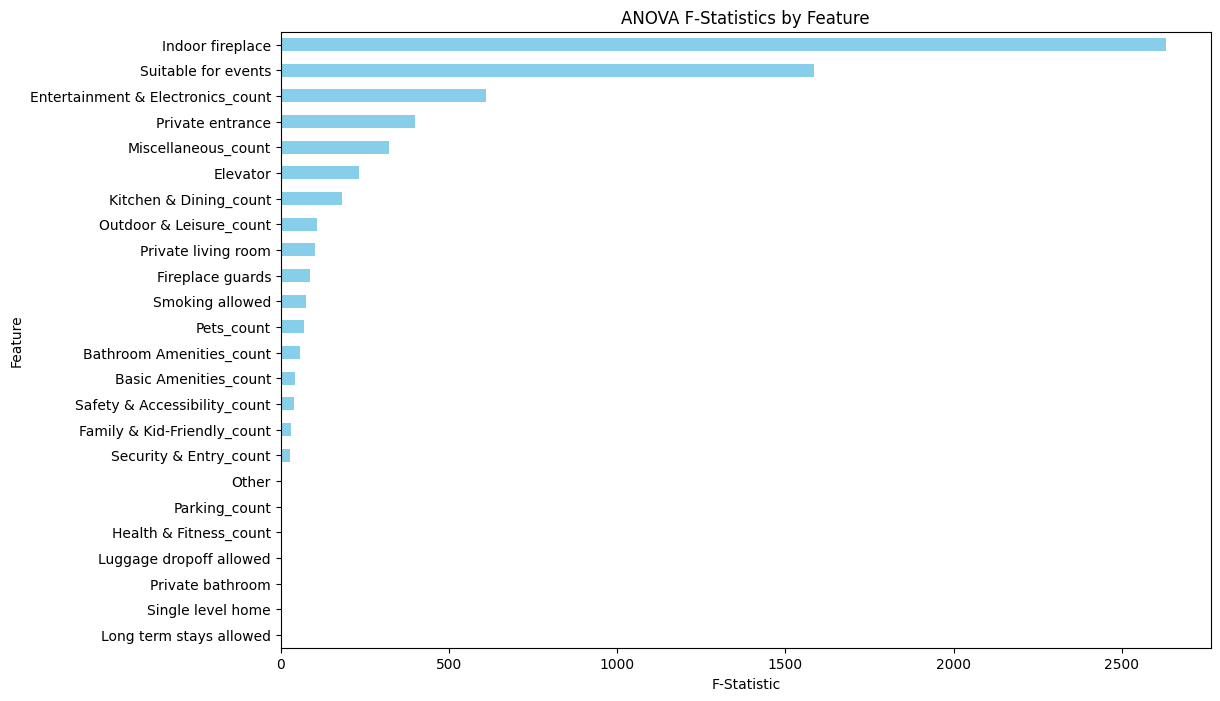

In [ ]:
# Plot F-Statistics
plt.figure(figsize=(12, 8))
anova_results_df['F-Statistic'].sort_values().plot(kind='barh', color='skyblue')
plt.title('ANOVA F-Statistics by Feature')
plt.xlabel('F-Statistic')
plt.ylabel('Feature')
plt.show()


### **2. Bar Plot of P-Values**
Another useful plot is a bar plot of P-values. This helps us see which features have significant p-values, indicating that the differences in means are statistically significant.

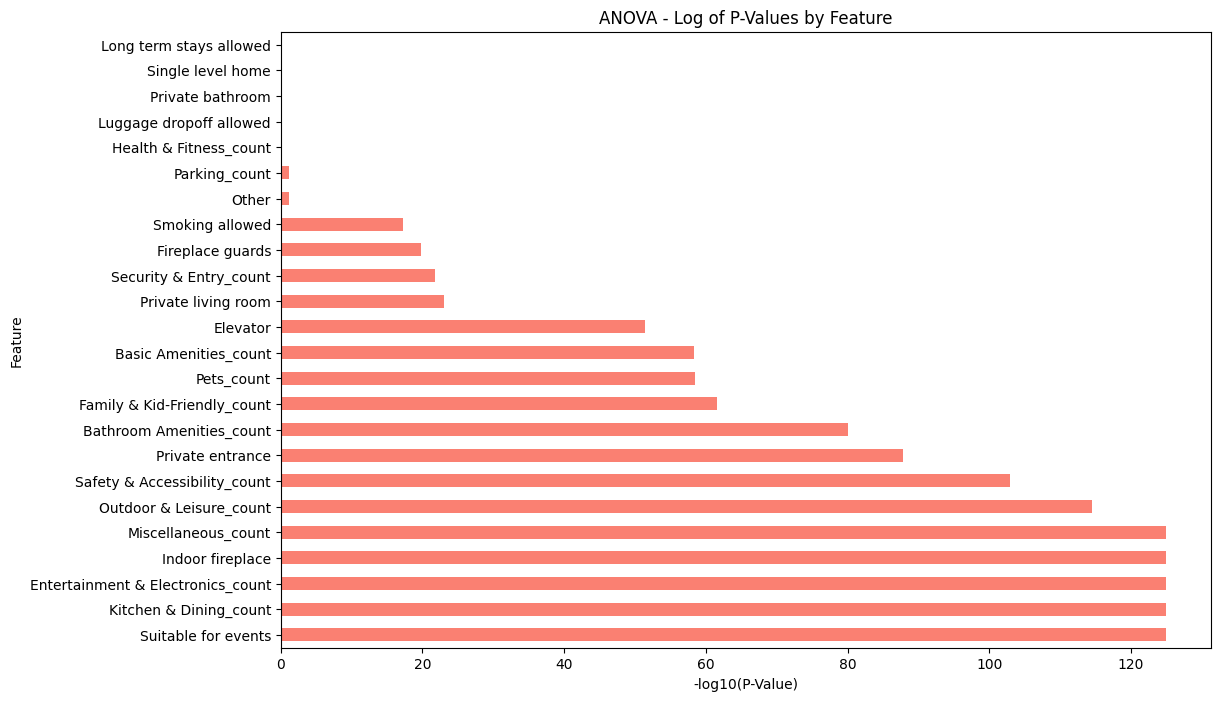

In [ ]:
# Replace zero P-values with a very small positive value
epsilon = 1e-125
anova_results_df['P-Value'] = anova_results_df['P-Value'].replace(0, epsilon)

# Compute the log of P-values
anova_results_df['Log-P-Value'] = -np.log10(anova_results_df['P-Value'])

# Plot Log of P-Values
plt.figure(figsize=(12, 8))
anova_results_df['Log-P-Value'].sort_values().plot(kind='barh', color='salmon')
plt.title('ANOVA - Log of P-Values by Feature')
plt.xlabel('-log10(P-Value)')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # To have the highest Log-P-Value on top
plt.show()


### **3. Scatter Plot of F-Statistic vs. P-Value**
A scatter plot can show the relationship between the F-Statistic and P-Value, giving insight into the strength of the effect and the significance level.

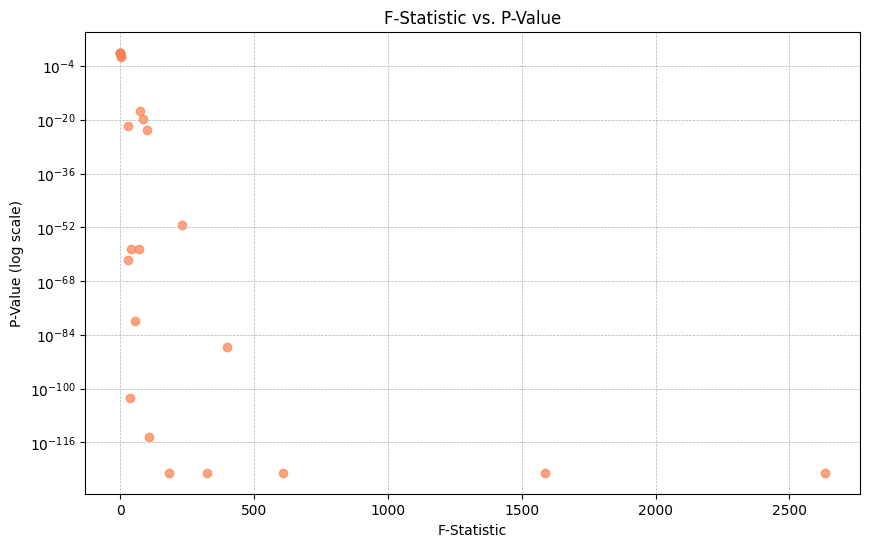

In [ ]:
# Scatter Plot of F-Statistic vs. P-Value
plt.figure(figsize=(10, 6))
plt.scatter(anova_results_df['F-Statistic'], anova_results_df['P-Value'], color='coral', alpha=0.7)
plt.yscale('log')  # Use log scale for better visibility of small P-Values
plt.title('F-Statistic vs. P-Value')
plt.xlabel('F-Statistic')
plt.ylabel('P-Value (log scale)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


### **Summary**
1. **Bar Plot of F-Statistics:** To see which features have the most significant effect.
2. **Bar Plot of P-Values:** To identify which features are statistically significant.
3. **Scatter Plot of F-Statistic vs. P-Value:** To observe the relationship between effect size and significance.

# Model

In [ ]:
pd.set_option('display.max_columns', None)
final_df.sample()

id  log_price                                          amenities  \
5332  7399449   5.010635  {TV,"Cable TV",Internet,"Wireless Internet",Ki...   

      accommodates  bathrooms  cleaning_fee  \
5332             2        1.0          True   

                                            description  host_has_profile_pic  \
5332  Have an Extraordinary Experience while staying...                  True   

      host_identity_verified  host_response_rate host_since  instant_bookable  \
5332                    True                 1.0  9/28/2010             False   

     last_review   latitude  longitude  \
5332  2016-12-23  37.771727 -122.42851   

                                              name neighbourhood  \
5332  Luxe Urban Style @ The Webster San Francisco  Lower Haight   

      number_of_reviews  review_scores_rating zipcode  bedrooms  beds  \
5332                 33                  94.0   94117       1.0   1.0   

      Cluster  city_boston  city_chicago  city_dc  city_la  city_nyc  city_sf  \
5332        3        False         False    False    False     False     True   

      room_type_Entire home/apt  room_type_Private room  \
5332                      False                    True   

      room_type_Shared room  property_type_Apartment  \
5332                  False                    False   

      property_type_Bed & Breakfast  property_type_Boat  \
5332                          False               False   

      property_type_Boutique hotel  property_type_Bungalow  \
5332                         False                   False   

      property_type_Cabin  property_type_Camper/RV  \
5332                False                    False   

      property_type_Casa particular  property_type_Castle  property_type_Cave  \
5332                          False                 False               False   

      property_type_Chalet  property_type_Condominium  property_type_Dorm  \
5332                 False                      False               False   

      property_type_Earth House  property_type_Guest suite  \
5332                      False                      False   

      property_type_Guesthouse  property_type_Hostel  property_type_House  \
5332                     False                 False                 True   

      property_type_Hut  property_type_In-law  property_type_Island  \
5332              False                 False                 False   

      property_type_Lighthouse  property_type_Loft  property_type_Other  \
5332                     False               False                False   

      property_type_Parking Space  property_type_Serviced apartment  \
5332                        False                             False   

      property_type_Tent  property_type_Timeshare  property_type_Tipi  \
5332               False                    False               False   

      property_type_Townhouse  property_type_Train  property_type_Treehouse  \
5332                    False                False                    False   

      property_type_Vacation home  property_type_Villa  property_type_Yurt  \
5332                        False                False               False   

      bed_type_Airbed  bed_type_Couch  bed_type_Futon  bed_type_Pull-out Sofa  \
5332            False           False           False                   False   

      bed_type_Real Bed  cancellation_policy_flexible  \
5332               True                         False   

      cancellation_policy_moderate  cancellation_policy_strict  \
5332                         False                        True   

      cancellation_policy_super_strict_30  \
5332                                False   

      cancellation_policy_super_strict_60  host_tenure  relevance  \
5332                                False    13.954825   0.910035   

                                  description_processed  sentiment  \
5332  have extraordinary experience staying san fran...      0.886   

           Price Bin              

In [ ]:
df2=final_df.copy()

In [ ]:
final_df=df2.copy()

In [ ]:
# df2=final_df.copy()
final_df = final_df.drop(['id','amenities','description','description_processed','Price Bin'], axis=1)


In [ ]:
final_df = final_df.merge(neighbourhood_df[['neighbourhood', 'cluster']], on='neighbourhood', how='left')


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'neighbourhood' column
final_df['neighbourhood_encoded'] = label_encoder.fit_transform(final_df['neighbourhood'])


In [ ]:
# Import KNNImputer
from sklearn.impute import KNNImputer

# Select features for imputation
features = ['latitude', 'longitude']

# Create a KNNImputer object
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the imputer on the selected features
final_df[['latitude', 'longitude', 'cluster']] = imputer.fit_transform(final_df[['latitude', 'longitude', 'cluster']])


In [ ]:
final_df = final_df.drop(columns=['host_since','name','neighbourhood','last_review','cleaned_amenities',	'amenities_list',	'unified_amenities',	'unified_amenities_list',	'Safety & Accessibility',	'Entertainment & Electronics',	'Basic Amenities',	'Family & Kid-Friendly',	'Kitchen & Dining',	'Health & Fitness',	'Pets',	'Parking',	'Outdoor & Leisure',	'Security & Entry',	'Bathroom Amenities',	'Special Features',	'Miscellaneous',	'Uncategorized'])

In [ ]:
final_df = final_df.drop('zipcode', axis=1)
final_df['host_tenure'].fillna(0, inplace=True)


In [ ]:
final_df.isna().sum()

log_price                0
accommodates             0
bathrooms                0
cleaning_fee             0
host_has_profile_pic     0
                        ..
Miscellaneous_count      0
Uncategorized_count      0
price                    0
cluster                  0
neighbourhood_encoded    0
Length: 100, dtype: int64

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Separate features and target variable
X = final_df.drop(['log_price', 'price'], axis=1)
y = final_df['log_price']

# Apply SelectKBest with f_regression for feature selection
selector = SelectKBest(score_func=f_regression, k=97)  # Select top 50 features
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_features_indices]

# Create a new DataFrame with selected features
X_selected = pd.DataFrame(X_new, columns=selected_features)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2,random_state=42)

# Create an XGBoost regressor
model = xgb.XGBRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.1445741844986088
R-squared: 0.7185771928156824


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.7 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

model_cat = CatBoostRegressor(iterations=1000,
                          learning_rate=0.1,
                          depth=10,
                          loss_function='RMSE')

# Train the model
model_cat.fit(X_train, y_train,
          eval_set=(X_test, y_test),
          verbose=False)

y_pred_cat = model_cat.predict(X_test)

mse_cat = mean_squared_error(y_test, y_pred_cat)
r2_cat = r2_score(y_test, y_pred_cat)

print(f'Mean Squared Error: {mse_cat}')
print(f'R-squared: {r2_cat}')

Mean Squared Error: 0.13688832645287405
R-squared: 0.733538202309543


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor with 100 trees
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)

r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error: {mse_rf}')
print(f'R-squared: {r2_rf}')

Mean Squared Error: 0.14657209130705867
R-squared: 0.7146881406693635


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

base_estimator = DecisionTreeRegressor(max_depth=4)
adaboost = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=50, learning_rate=1.0)
adaboost.fit(X_train, y_train)

# Make predictions on the test set
y_pred_adaboost = adaboost.predict(X_test)

# Evaluate the model
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
r2_adaboost = r2_score(y_test, y_pred_adaboost)

print(f'Mean Squared Error: {mse_adaboost}')
print(f'R-squared: {r2_adaboost}')

Mean Squared Error: 0.297711240224332
R-squared: 0.42441903032779604


In [ ]:
import lightgbm as lgb

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 127,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

model_lgb = lgb.train(params,
                train_data,
                num_boost_round=100,
                valid_sets=[test_data],
               )

y_pred_lgb = model_lgb.predict(X_test)

mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f'Mean Squared Error: {mse_lgb}')
print(f'R-squared: {r2_lgb}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.036364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2170
[LightGBM] [Info] Number of data points in the train set: 59288, number of used features: 79
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 4.782128
Mean Squared Error: 0.14529728092225488
R-squared: 0.7190890415123434


In [ ]:
from sklearn.ensemble import RandomForestRegressor, VotingRegressor # Import the VotingRegressor class
import xgboost as xgb
#lgbm_model = lgb.LGBMRegressor()
model_cat = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=10, loss_function='RMSE')

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = xgb.XGBRegressor()

ensemble_model = VotingRegressor(
    estimators=[('cat', model_cat), ('xgb', xgb_model)] # Remove lgbm_model and rf from estimators
)

ensemble_model.fit(X_train, y_train) # Change X_train_lgb to X_train
y_pred_ensemble = ensemble_model.predict(X_test) # Change X_test_lgb to X_test

mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

print(f'Mean Squared Error: {mse_ensemble}')
print(f'R-squared: {r2_ensemble}')

0:	learn: 0.6777072	total: 224ms	remaining: 3m 44s
1:	learn: 0.6410127	total: 439ms	remaining: 3m 39s
2:	learn: 0.6103768	total: 656ms	remaining: 3m 37s
3:	learn: 0.5813710	total: 816ms	remaining: 3m 23s
4:	learn: 0.5576484	total: 970ms	remaining: 3m 13s
5:	learn: 0.5379553	total: 1.13s	remaining: 3m 7s
6:	learn: 0.5192485	total: 1.32s	remaining: 3m 6s
7:	learn: 0.5028965	total: 1.51s	remaining: 3m 6s
8:	learn: 0.4905968	total: 1.7s	remaining: 3m 6s
9:	learn: 0.4789064	total: 1.9s	remaining: 3m 8s
10:	learn: 0.4695152	total: 2.11s	remaining: 3m 9s
11:	learn: 0.4613235	total: 2.32s	remaining: 3m 11s
12:	learn: 0.4538764	total: 2.53s	remaining: 3m 12s
13:	learn: 0.4475736	total: 2.74s	remaining: 3m 13s
14:	learn: 0.4409081	total: 2.94s	remaining: 3m 13s
15:	learn: 0.4362493	total: 3.1s	remaining: 3m 10s
16:	learn: 0.4310862	total: 3.23s	remaining: 3m 6s
17:	learn: 0.4264904	total: 3.34s	remaining: 3m 2s
18:	learn: 0.4223193	total: 3.48s	remaining: 2m 59s
19:	learn: 0.4193758	total: 3.61s

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
import lightgbm as lgb
# Define the base models
estimators = [
    # ('rf', ),
    ('xgb', xgb.XGBRegressor()),
    ('catboost', model_cat)
]
# Define the meta-model
final_estimator =  lgb.LGBMRegressor()

# Create the stacking regressor
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5
)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_stacking = stacking_model.predict(X_test)

# Evaluate the model
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)

print(f'Mean Squared Error: {mse_stacking}')
print(f'R-squared: {r2_stacking}')

Streaming output truncated to the last 5000 lines.
7:	learn: 0.5018666	total: 493ms	remaining: 1m 1s
8:	learn: 0.4875720	total: 572ms	remaining: 1m 2s
9:	learn: 0.4764614	total: 635ms	remaining: 1m 2s
10:	learn: 0.4654106	total: 695ms	remaining: 1m 2s
11:	learn: 0.4560100	total: 759ms	remaining: 1m 2s
12:	learn: 0.4490764	total: 825ms	remaining: 1m 2s
13:	learn: 0.4424025	total: 895ms	remaining: 1m 3s
14:	learn: 0.4369955	total: 957ms	remaining: 1m 2s
15:	learn: 0.4322594	total: 1.02s	remaining: 1m 2s
16:	learn: 0.4274830	total: 1.08s	remaining: 1m 2s
17:	learn: 0.4231352	total: 1.14s	remaining: 1m 2s
18:	learn: 0.4190810	total: 1.21s	remaining: 1m 2s
19:	learn: 0.4160697	total: 1.27s	remaining: 1m 2s
20:	learn: 0.4132973	total: 1.34s	remaining: 1m 2s
21:	learn: 0.4106823	total: 1.4s	remaining: 1m 2s
22:	learn: 0.4086370	total: 1.46s	remaining: 1m 2s
23:	learn: 0.4066730	total: 1.52s	remaining: 1m 1s
24:	learn: 0.4044311	total: 1.63s	remaining: 1m 3s
25:	learn: 0.4025636	total: 1.74s	r

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
import lightgbm as lgb
# Define the base models
estimators = [
    # ('rf', ),
    ('xgb', xgb.XGBRegressor()),
    ('catboost', model_cat)
]
# Define the meta-model
final_estimator =  LinearRegression()

# Create the stacking regressor
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5
)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_stacking = stacking_model.predict(X_test)

# Evaluate the model
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)

print(f'Mean Squared Error: {mse_stacking}')
print(f'R-squared: {r2_stacking}')

Streaming output truncated to the last 5000 lines.
2:	learn: 0.6097404	total: 391ms	remaining: 2m 9s
3:	learn: 0.5825347	total: 518ms	remaining: 2m 8s
4:	learn: 0.5587248	total: 652ms	remaining: 2m 9s
5:	learn: 0.5362227	total: 783ms	remaining: 2m 9s
6:	learn: 0.5189624	total: 918ms	remaining: 2m 10s
7:	learn: 0.5018666	total: 1.04s	remaining: 2m 9s
8:	learn: 0.4875720	total: 1.16s	remaining: 2m 7s
9:	learn: 0.4764614	total: 1.26s	remaining: 2m 4s
10:	learn: 0.4654106	total: 1.39s	remaining: 2m 4s
11:	learn: 0.4560100	total: 1.51s	remaining: 2m 4s
12:	learn: 0.4490764	total: 1.64s	remaining: 2m 4s
13:	learn: 0.4424025	total: 1.77s	remaining: 2m 4s
14:	learn: 0.4369955	total: 1.91s	remaining: 2m 5s
15:	learn: 0.4322594	total: 2.02s	remaining: 2m 4s
16:	learn: 0.4274830	total: 2.16s	remaining: 2m 4s
17:	learn: 0.4231352	total: 2.26s	remaining: 2m 3s
18:	learn: 0.4190810	total: 2.39s	remaining: 2m 3s
19:	learn: 0.4160697	total: 2.52s	remaining: 2m 3s
20:	learn: 0.4132973	total: 2.66s	rema

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
import lightgbm as lgb
# Define the base models
estimators = [
    # ('rf', ),
    ('xgb', xgb.XGBRegressor()),
    ('catboost', model_cat)
]
# Define the meta-model
final_estimator = RandomForestRegressor(n_estimators=100, random_state=42)

# Create the stacking regressor
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5
)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_stacking = stacking_model.predict(X_test)

# Evaluate the model
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)

print(f'Mean Squared Error: {mse_stacking}')
print(f'R-squared: {r2_stacking}')

Streaming output truncated to the last 5000 lines.
2:	learn: 0.6097404	total: 184ms	remaining: 1m 1s
3:	learn: 0.5825347	total: 257ms	remaining: 1m 3s
4:	learn: 0.5587248	total: 325ms	remaining: 1m 4s
5:	learn: 0.5362227	total: 385ms	remaining: 1m 3s
6:	learn: 0.5189624	total: 445ms	remaining: 1m 3s
7:	learn: 0.5018666	total: 509ms	remaining: 1m 3s
8:	learn: 0.4875720	total: 573ms	remaining: 1m 3s
9:	learn: 0.4764614	total: 636ms	remaining: 1m 2s
10:	learn: 0.4654106	total: 697ms	remaining: 1m 2s
11:	learn: 0.4560100	total: 764ms	remaining: 1m 2s
12:	learn: 0.4490764	total: 831ms	remaining: 1m 3s
13:	learn: 0.4424025	total: 894ms	remaining: 1m 2s
14:	learn: 0.4369955	total: 954ms	remaining: 1m 2s
15:	learn: 0.4322594	total: 1.01s	remaining: 1m 2s
16:	learn: 0.4274830	total: 1.08s	remaining: 1m 2s
17:	learn: 0.4231352	total: 1.14s	remaining: 1m 2s
18:	learn: 0.4190810	total: 1.25s	remaining: 1m 4s
19:	learn: 0.4160697	total: 1.51s	remaining: 1m 14s
20:	learn: 0.4132973	total: 1.73s	rema